In [1]:
!pip install visJS2jupyter

  Created wheel for visJS2jupyter: filename=visJS2jupyter-0.1.16-cp36-none-any.whl size=23480 sha256=4d2be629ab9e292b97f066db69755e544e07b43d5b53abb199a7aa3b492b07ee
  Stored in directory: /home/toutou/.cache/pip/wheels/20/c2/da/f27a63ce3631fc1fca7863c1d61aa78db883878e617ec87d54
Successfully built visJS2jupyter
You should consider upgrading via the 'pip install --upgrade pip' command.


In [8]:
import visJS2jupyter
from visJS2jupyter import visJS_module
import networkx as nx
import itertools
import copy
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from random import randint
import math
import matplotlib as mpl
import networkx as nx

from gensim.utils import simple_preprocess
import pandas
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from gensim import corpora, models
from gensim.models import  Word2Vec
import gensim
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from matplotlib import cm 
from gensim.models import CoherenceModel

,node1,node2,trail,distance,color,estimate
0,rs_end_north,v_rs,rs,0.30,red,0
1,v_rs,b_rs,rs,0.21,red,0
2,b_rs,g_rs,rs,0.11,red,0
3,g_rs,w_rs,rs,0.18,red,0
4,w_rs,o_rs,rs,0.21,red,0


['rs_end_north',
 'v_rs',
 'b_rs',
 'g_rs',
 'w_rs',
 'o_rs',
 'y_rs',
 'rs_end_south',
 'rc_end_north',
 'v_rc',
 'b_rc',
 'g_rc',
 'o_rc',
 'w_rc',
 'y_rc',
 'rc_end_south',
 'rt_end_north',
 'v_rt',
 'tt_rt',
 'b_rt',
 'g_rt',
 'o_rt',
 'w_rt',
 'y_rt',
 'rt_end_south',
 'rh_end_north',
 'v_rh',
 'b_rh',
 'rh_end_tt_1',
 'rh_end_tt_2',
 'o_rh',
 'rh_end_tt_3',
 'rh_end_tt_4',
 'y_rh',
 'rh_end_south',
 'rd_end_north',
 'v_rd',
 'b_rd',
 'rd_end_south',
 'v_end_west',
 'b_v',
 'v_bv',
 'v_end_east',
 'bstub_w',
 'b_end_west',
 'rd_end_south_dupe',
 'b_rd_dupe',
 'b_tt_1',
 'b_bw',
 'b_tt_2',
 'b_tt_3',
 'b_bv',
 'b_g',
 'b_w',
 'b_gy2',
 'b_o',
 'b_y',
 'b_end_east',
 'w_tt',
 'w_bw',
 'g_w',
 'o_w_1',
 'w_gy1',
 'o_w_2',
 'w_gy2',
 'park_east',
 'g_gy1',
 'g_gy2',
 'o_y_tt_end_west',
 'o_tt',
 'o_gy1',
 'o_gy2',
 'y_gy1',
 'y_gy2',
 'nature_end_west',
 'b_tt_2_dupe',
 'b_tt_3_dupe']

"visJS2jupyter.visJS_module.visjs_network(nodes_dict,\n                                         edges_dict,\n                                         edge_arrow_to=True,\n                                         edge_width=20,\n                                         node_size_multiplier=20,\n                                         physics_enabled=True,\n                                         min_velocity=1,\n                                         max_velocity=20,\n                                         min_label_size=20,\n                                         max_label_size=35,\n                                         graph_title = 'Metro Map for '+str(1)+' '\n                                        \n                                            \n)\n#                                         graph_title = 'Metro Map for '+str(num_mutations)+' ')\n"

# Application sur les thematique de NYT

## Determination du nombre optimal des thematiques


In [3]:
#data2=pd.read_csv("/home/toutou/nyt.csv/nyt5.csv",sep='\t') ## Data enrichie
data3=pd.read_csv("/home/toutou/nyt.csv/nyt.csv",sep='\t') 

df=data3
var_texte = 'texts'#titles
doc_titles=df['titles'].tolist()
doc_dates=df.dates.tolist()
doc_set = df[var_texte].tolist()
# fonction qui génère les listes de mots (token) à partir des textes
def sent_to_words(sentences):
    for sentence in sentences:
        yield(simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

# on construit le corpus
data_words = list(sent_to_words(doc_set))
ndocs = len(data_words)
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

# on retire les mots-outils
data_words_nostops = remove_stopwords(data_words)
# création du dictionnaire
dico = corpora.Dictionary(data_words_nostops)

# ce qui permet par ex. de filtrer le vocabulaire
dico.filter_extremes(no_below=10)

# Create Corpus
texts = data_words_nostops

# matrice Term Document Frequency
corpus = [dico.doc2bow(text) for text in texts]
ntopics = 5 # 5 est le nombre optimal de thématique 
from gensim.models.ldamodel import LdaModel


In [10]:
coherence=[]
mod=[]
for nb in range(2,30,2):
    lda =  LdaModel(corpus, num_topics=nb, id2word = dico,
                                           passes=2, random_state=100, per_word_topics=True)
    mod.append(lda)
    cohe=CoherenceModel(model=lda, texts=data_words_nostops, dictionary=dico, coherence='c_v')
    coherence.append(cohe.get_coherence())
    
   

    
coherence                                                                               

2020-02-27 23:33:57,036 : INFO : using symmetric alpha at 0.5
2020-02-27 23:33:57,037 : INFO : using symmetric eta at 0.5
2020-02-27 23:33:57,043 : INFO : using serial LDA version on this node
2020-02-27 23:33:57,050 : INFO : running online (multi-pass) LDA training, 2 topics, 2 passes over the supplied corpus of 7146 documents, updating model once every 2000 documents, evaluating perplexity every 7146 documents, iterating 50x with a convergence threshold of 0.001000
2020-02-27 23:33:57,051 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2020-02-27 23:33:57,053 : INFO : PROGRESS: pass 0, at document #2000/7146
2020-02-27 23:33:58,922 : INFO : merging changes from 2000 documents into a model of 7146 documents
2020-02-27 23:33:58,926 : INFO : topic #0 (0.500): 0.005*"party" + 0.005*"city" + 0.005*"state" + 0.004*"today" + 0.003*"opposition" + 0.003*"leader" + 0.003*"officials" + 0.003*"minister" + 0.003*

2020-02-27 23:34:18,889 : INFO : 17 batches submitted to accumulate stats from 1088 documents (314644 virtual)
2020-02-27 23:34:18,951 : INFO : 18 batches submitted to accumulate stats from 1152 documents (332237 virtual)
2020-02-27 23:34:19,247 : INFO : 19 batches submitted to accumulate stats from 1216 documents (353026 virtual)
2020-02-27 23:34:19,783 : INFO : 20 batches submitted to accumulate stats from 1280 documents (374408 virtual)
2020-02-27 23:34:20,411 : INFO : 21 batches submitted to accumulate stats from 1344 documents (400641 virtual)
2020-02-27 23:34:20,448 : INFO : 22 batches submitted to accumulate stats from 1408 documents (420990 virtual)
2020-02-27 23:34:21,000 : INFO : 23 batches submitted to accumulate stats from 1472 documents (443443 virtual)
2020-02-27 23:34:21,570 : INFO : 24 batches submitted to accumulate stats from 1536 documents (460909 virtual)
2020-02-27 23:34:21,818 : INFO : 25 batches submitted to accumulate stats from 1600 documents (485968 virtual)
2

2020-02-27 23:34:45,057 : INFO : 91 batches submitted to accumulate stats from 5824 documents (2044781 virtual)
2020-02-27 23:34:45,646 : INFO : 92 batches submitted to accumulate stats from 5888 documents (2067359 virtual)
2020-02-27 23:34:45,683 : INFO : 93 batches submitted to accumulate stats from 5952 documents (2093393 virtual)
2020-02-27 23:34:45,870 : INFO : 94 batches submitted to accumulate stats from 6016 documents (2115969 virtual)
2020-02-27 23:34:46,315 : INFO : 95 batches submitted to accumulate stats from 6080 documents (2139139 virtual)
2020-02-27 23:34:46,819 : INFO : 96 batches submitted to accumulate stats from 6144 documents (2161987 virtual)
2020-02-27 23:34:46,899 : INFO : 97 batches submitted to accumulate stats from 6208 documents (2183839 virtual)
2020-02-27 23:34:47,433 : INFO : 98 batches submitted to accumulate stats from 6272 documents (2204908 virtual)
2020-02-27 23:34:47,672 : INFO : 99 batches submitted to accumulate stats from 6336 documents (2235166 v

2020-02-27 23:35:07,204 : INFO : topic #0 (0.250): 0.006*"today" + 0.006*"party" + 0.006*"united" + 0.005*"military" + 0.005*"minister" + 0.004*"country" + 0.004*"states" + 0.003*"prime" + 0.003*"officials" + 0.003*"general"
2020-02-27 23:35:07,206 : INFO : topic #1 (0.250): 0.014*"city" + 0.010*"state" + 0.007*"mayor" + 0.006*"york" + 0.005*"council" + 0.005*"commission" + 0.004*"party" + 0.004*"yesterday" + 0.004*"board" + 0.004*"public"
2020-02-27 23:35:07,208 : INFO : topic #2 (0.250): 0.009*"city" + 0.008*"mayor" + 0.005*"state" + 0.004*"york" + 0.004*"giuliani" + 0.004*"party" + 0.004*"governor" + 0.003*"first" + 0.003*"office" + 0.003*"time"
2020-02-27 23:35:07,209 : INFO : topic #3 (0.250): 0.011*"party" + 0.005*"soviet" + 0.004*"yeltsin" + 0.004*"today" + 0.004*"minister" + 0.004*"gorbachev" + 0.004*"country" + 0.003*"many" + 0.003*"south" + 0.003*"parliament"
2020-02-27 23:35:07,211 : INFO : topic diff=0.337132, rho=0.423600
2020-02-27 23:35:07,212 : INFO : PROGRESS: pass 1, 

2020-02-27 23:35:24,818 : INFO : 34 batches submitted to accumulate stats from 2176 documents (680569 virtual)
2020-02-27 23:35:25,145 : INFO : 35 batches submitted to accumulate stats from 2240 documents (706164 virtual)
2020-02-27 23:35:25,529 : INFO : 36 batches submitted to accumulate stats from 2304 documents (732546 virtual)
2020-02-27 23:35:25,764 : INFO : 37 batches submitted to accumulate stats from 2368 documents (757176 virtual)
2020-02-27 23:35:25,958 : INFO : 38 batches submitted to accumulate stats from 2432 documents (783200 virtual)
2020-02-27 23:35:26,588 : INFO : 39 batches submitted to accumulate stats from 2496 documents (803776 virtual)
2020-02-27 23:35:26,989 : INFO : 40 batches submitted to accumulate stats from 2560 documents (831332 virtual)
2020-02-27 23:35:27,427 : INFO : 41 batches submitted to accumulate stats from 2624 documents (853524 virtual)
2020-02-27 23:35:27,496 : INFO : 42 batches submitted to accumulate stats from 2688 documents (874700 virtual)
2

2020-02-27 23:35:52,676 : INFO : 108 batches submitted to accumulate stats from 6912 documents (2461695 virtual)
2020-02-27 23:35:52,765 : INFO : 109 batches submitted to accumulate stats from 6976 documents (2483923 virtual)
2020-02-27 23:35:53,117 : INFO : 110 batches submitted to accumulate stats from 7040 documents (2497836 virtual)
2020-02-27 23:35:54,789 : INFO : serializing accumulator to return to master...
2020-02-27 23:35:54,791 : INFO : accumulator serialized
2020-02-27 23:35:55,049 : INFO : serializing accumulator to return to master...
2020-02-27 23:35:55,051 : INFO : accumulator serialized
2020-02-27 23:35:55,150 : INFO : serializing accumulator to return to master...
2020-02-27 23:35:55,152 : INFO : accumulator serialized
2020-02-27 23:35:55,217 : INFO : 3 accumulators retrieved from output queue
2020-02-27 23:35:55,242 : INFO : accumulated word occurrence stats for 2507942 virtual documents
2020-02-27 23:35:55,504 : INFO : using symmetric alpha at 0.16666666666666666
20

2020-02-27 23:36:09,530 : INFO : topic diff=0.386828, rho=0.423600
2020-02-27 23:36:09,532 : INFO : PROGRESS: pass 1, at document #4000/7146
2020-02-27 23:36:12,121 : INFO : merging changes from 2000 documents into a model of 7146 documents
2020-02-27 23:36:12,128 : INFO : topic #4 (0.167): 0.019*"party" + 0.006*"minister" + 0.005*"prime" + 0.004*"china" + 0.004*"today" + 0.003*"mrs" + 0.003*"many" + 0.003*"labor" + 0.003*"ms" + 0.003*"election"
2020-02-27 23:36:12,130 : INFO : topic #5 (0.167): 0.007*"united" + 0.007*"military" + 0.006*"party" + 0.006*"minister" + 0.006*"today" + 0.005*"general" + 0.005*"country" + 0.005*"states" + 0.004*"prime" + 0.004*"leaders"
2020-02-27 23:36:12,135 : INFO : topic #3 (0.167): 0.010*"party" + 0.009*"soviet" + 0.008*"gorbachev" + 0.005*"communist" + 0.005*"yeltsin" + 0.004*"today" + 0.004*"south" + 0.004*"union" + 0.004*"country" + 0.004*"congress"
2020-02-27 23:36:12,138 : INFO : topic #2 (0.167): 0.011*"city" + 0.011*"mayor" + 0.006*"state" + 0.00

2020-02-27 23:36:29,567 : INFO : 36 batches submitted to accumulate stats from 2304 documents (732290 virtual)
2020-02-27 23:36:29,634 : INFO : 37 batches submitted to accumulate stats from 2368 documents (755706 virtual)
2020-02-27 23:36:29,794 : INFO : 38 batches submitted to accumulate stats from 2432 documents (782369 virtual)
2020-02-27 23:36:30,488 : INFO : 39 batches submitted to accumulate stats from 2496 documents (802849 virtual)
2020-02-27 23:36:30,972 : INFO : 40 batches submitted to accumulate stats from 2560 documents (830938 virtual)
2020-02-27 23:36:31,152 : INFO : 41 batches submitted to accumulate stats from 2624 documents (852506 virtual)
2020-02-27 23:36:31,443 : INFO : 42 batches submitted to accumulate stats from 2688 documents (874030 virtual)
2020-02-27 23:36:32,514 : INFO : 43 batches submitted to accumulate stats from 2752 documents (894579 virtual)
2020-02-27 23:36:32,679 : INFO : 44 batches submitted to accumulate stats from 2816 documents (917035 virtual)
2

2020-02-27 23:37:01,731 : INFO : 110 batches submitted to accumulate stats from 7040 documents (2497724 virtual)
2020-02-27 23:37:03,576 : INFO : serializing accumulator to return to master...
2020-02-27 23:37:03,580 : INFO : accumulator serialized
2020-02-27 23:37:03,680 : INFO : serializing accumulator to return to master...
2020-02-27 23:37:03,684 : INFO : accumulator serialized
2020-02-27 23:37:03,866 : INFO : serializing accumulator to return to master...
2020-02-27 23:37:03,870 : INFO : accumulator serialized
2020-02-27 23:37:03,931 : INFO : 3 accumulators retrieved from output queue
2020-02-27 23:37:03,974 : INFO : accumulated word occurrence stats for 2507946 virtual documents
2020-02-27 23:37:04,354 : INFO : using symmetric alpha at 0.125
2020-02-27 23:37:04,355 : INFO : using symmetric eta at 0.125
2020-02-27 23:37:04,360 : INFO : using serial LDA version on this node
2020-02-27 23:37:04,380 : INFO : running online (multi-pass) LDA training, 8 topics, 2 passes over the suppli

2020-02-27 23:37:21,633 : INFO : merging changes from 2000 documents into a model of 7146 documents
2020-02-27 23:37:21,642 : INFO : topic #0 (0.125): 0.007*"today" + 0.005*"police" + 0.004*"communist" + 0.004*"united" + 0.004*"country" + 0.004*"party" + 0.004*"solidarity" + 0.004*"opposition" + 0.003*"military" + 0.003*"minister"
2020-02-27 23:37:21,644 : INFO : topic #4 (0.125): 0.017*"party" + 0.006*"minister" + 0.004*"china" + 0.004*"today" + 0.004*"prime" + 0.004*"country" + 0.004*"national" + 0.003*"power" + 0.003*"many" + 0.003*"congress"
2020-02-27 23:37:21,646 : INFO : topic #6 (0.125): 0.021*"party" + 0.009*"state" + 0.006*"former" + 0.005*"minister" + 0.005*"governor" + 0.004*"leader" + 0.004*"democratic" + 0.004*"corruption" + 0.004*"prime" + 0.004*"gandhi"
2020-02-27 23:37:21,647 : INFO : topic #2 (0.125): 0.012*"mayor" + 0.012*"city" + 0.005*"koch" + 0.005*"dinkins" + 0.005*"york" + 0.005*"state" + 0.004*"east" + 0.004*"first" + 0.004*"giuliani" + 0.004*"office"
2020-02-2

2020-02-27 23:37:44,106 : INFO : 37 batches submitted to accumulate stats from 2368 documents (755288 virtual)
2020-02-27 23:37:44,367 : INFO : 38 batches submitted to accumulate stats from 2432 documents (781864 virtual)
2020-02-27 23:37:45,112 : INFO : 39 batches submitted to accumulate stats from 2496 documents (802136 virtual)
2020-02-27 23:37:45,474 : INFO : 40 batches submitted to accumulate stats from 2560 documents (828897 virtual)
2020-02-27 23:37:46,158 : INFO : 41 batches submitted to accumulate stats from 2624 documents (851895 virtual)
2020-02-27 23:37:46,243 : INFO : 42 batches submitted to accumulate stats from 2688 documents (873903 virtual)
2020-02-27 23:37:46,948 : INFO : 43 batches submitted to accumulate stats from 2752 documents (894062 virtual)
2020-02-27 23:37:47,143 : INFO : 44 batches submitted to accumulate stats from 2816 documents (916581 virtual)
2020-02-27 23:37:47,778 : INFO : 45 batches submitted to accumulate stats from 2880 documents (938878 virtual)
2

2020-02-27 23:38:21,524 : INFO : serializing accumulator to return to master...
2020-02-27 23:38:21,531 : INFO : accumulator serialized
2020-02-27 23:38:21,908 : INFO : serializing accumulator to return to master...
2020-02-27 23:38:21,912 : INFO : accumulator serialized
2020-02-27 23:38:22,120 : INFO : serializing accumulator to return to master...
2020-02-27 23:38:22,122 : INFO : accumulator serialized
2020-02-27 23:38:22,228 : INFO : 3 accumulators retrieved from output queue
2020-02-27 23:38:22,278 : INFO : accumulated word occurrence stats for 2507958 virtual documents
2020-02-27 23:38:22,777 : INFO : using symmetric alpha at 0.1
2020-02-27 23:38:22,778 : INFO : using symmetric eta at 0.1
2020-02-27 23:38:22,783 : INFO : using serial LDA version on this node
2020-02-27 23:38:22,811 : INFO : running online (multi-pass) LDA training, 10 topics, 2 passes over the supplied corpus of 7146 documents, updating model once every 2000 documents, evaluating perplexity every 7146 documents, i

2020-02-27 23:38:42,290 : INFO : topic #2 (0.100): 0.013*"mayor" + 0.012*"city" + 0.006*"koch" + 0.006*"east" + 0.005*"dinkins" + 0.004*"german" + 0.004*"york" + 0.004*"germany" + 0.004*"first" + 0.003*"time"
2020-02-27 23:38:42,291 : INFO : topic #6 (0.100): 0.010*"party" + 0.008*"ms" + 0.008*"former" + 0.006*"state" + 0.005*"city" + 0.005*"charges" + 0.005*"federal" + 0.005*"yesterday" + 0.005*"trial" + 0.004*"judge"
2020-02-27 23:38:42,293 : INFO : topic #7 (0.100): 0.016*"commission" + 0.014*"city" + 0.012*"board" + 0.012*"borough" + 0.011*"court" + 0.008*"york" + 0.008*"myerson" + 0.007*"presidents" + 0.007*"ms" + 0.007*"charter"
2020-02-27 23:38:42,294 : INFO : topic #3 (0.100): 0.010*"soviet" + 0.009*"gorbachev" + 0.007*"party" + 0.005*"yeltsin" + 0.005*"communist" + 0.004*"today" + 0.004*"south" + 0.004*"union" + 0.004*"country" + 0.003*"moscow"
2020-02-27 23:38:42,295 : INFO : topic #4 (0.100): 0.012*"party" + 0.006*"minister" + 0.005*"today" + 0.004*"prime" + 0.004*"national"

2020-02-27 23:39:04,014 : INFO : 38 batches submitted to accumulate stats from 2432 documents (780334 virtual)
2020-02-27 23:39:04,455 : INFO : 39 batches submitted to accumulate stats from 2496 documents (801769 virtual)
2020-02-27 23:39:05,237 : INFO : 40 batches submitted to accumulate stats from 2560 documents (828263 virtual)
2020-02-27 23:39:05,574 : INFO : 41 batches submitted to accumulate stats from 2624 documents (851591 virtual)
2020-02-27 23:39:06,162 : INFO : 42 batches submitted to accumulate stats from 2688 documents (873369 virtual)
2020-02-27 23:39:06,928 : INFO : 43 batches submitted to accumulate stats from 2752 documents (893660 virtual)
2020-02-27 23:39:07,236 : INFO : 44 batches submitted to accumulate stats from 2816 documents (916072 virtual)
2020-02-27 23:39:07,510 : INFO : 45 batches submitted to accumulate stats from 2880 documents (938514 virtual)
2020-02-27 23:39:08,815 : INFO : 46 batches submitted to accumulate stats from 2944 documents (960617 virtual)
2

2020-02-27 23:39:43,316 : INFO : accumulator serialized
2020-02-27 23:39:43,567 : INFO : serializing accumulator to return to master...
2020-02-27 23:39:43,571 : INFO : accumulator serialized
2020-02-27 23:39:43,976 : INFO : serializing accumulator to return to master...
2020-02-27 23:39:43,979 : INFO : accumulator serialized
2020-02-27 23:39:44,069 : INFO : 3 accumulators retrieved from output queue
2020-02-27 23:39:44,142 : INFO : accumulated word occurrence stats for 2507962 virtual documents
2020-02-27 23:39:44,749 : INFO : using symmetric alpha at 0.08333333333333333
2020-02-27 23:39:44,750 : INFO : using symmetric eta at 0.08333333333333333
2020-02-27 23:39:44,756 : INFO : using serial LDA version on this node
2020-02-27 23:39:44,792 : INFO : running online (multi-pass) LDA training, 12 topics, 2 passes over the supplied corpus of 7146 documents, updating model once every 2000 documents, evaluating perplexity every 7146 documents, iterating 50x with a convergence threshold of 0.0

2020-02-27 23:40:04,591 : INFO : topic #10 (0.083): 0.019*"party" + 0.007*"communist" + 0.005*"minister" + 0.005*"soviet" + 0.004*"today" + 0.004*"economic" + 0.004*"country" + 0.004*"power" + 0.004*"leader" + 0.004*"china"
2020-02-27 23:40:04,592 : INFO : topic #5 (0.083): 0.010*"military" + 0.009*"united" + 0.008*"general" + 0.006*"today" + 0.006*"states" + 0.005*"haiti" + 0.005*"minister" + 0.005*"american" + 0.005*"japan" + 0.005*"country"
2020-02-27 23:40:04,594 : INFO : topic #7 (0.083): 0.017*"commission" + 0.015*"board" + 0.015*"borough" + 0.014*"court" + 0.011*"city" + 0.009*"presidents" + 0.009*"york" + 0.008*"charter" + 0.008*"members" + 0.006*"estimate"
2020-02-27 23:40:04,596 : INFO : topic #4 (0.083): 0.007*"party" + 0.006*"mrs" + 0.004*"country" + 0.004*"de" + 0.004*"today" + 0.004*"minister" + 0.004*"election" + 0.004*"percent" + 0.004*"thatcher" + 0.003*"many"
2020-02-27 23:40:04,597 : INFO : topic #2 (0.083): 0.020*"city" + 0.020*"mayor" + 0.009*"dinkins" + 0.008*"koc

2020-02-27 23:40:28,724 : INFO : 38 batches submitted to accumulate stats from 2432 documents (780074 virtual)
2020-02-27 23:40:28,959 : INFO : 39 batches submitted to accumulate stats from 2496 documents (801698 virtual)
2020-02-27 23:40:29,639 : INFO : 40 batches submitted to accumulate stats from 2560 documents (828215 virtual)
2020-02-27 23:40:30,878 : INFO : 41 batches submitted to accumulate stats from 2624 documents (851492 virtual)
2020-02-27 23:40:31,013 : INFO : 42 batches submitted to accumulate stats from 2688 documents (872710 virtual)
2020-02-27 23:40:31,080 : INFO : 43 batches submitted to accumulate stats from 2752 documents (892870 virtual)
2020-02-27 23:40:32,198 : INFO : 44 batches submitted to accumulate stats from 2816 documents (915577 virtual)
2020-02-27 23:40:32,497 : INFO : 45 batches submitted to accumulate stats from 2880 documents (938541 virtual)
2020-02-27 23:40:33,390 : INFO : 46 batches submitted to accumulate stats from 2944 documents (960644 virtual)
2

2020-02-27 23:41:11,716 : INFO : accumulator serialized
2020-02-27 23:41:12,329 : INFO : serializing accumulator to return to master...
2020-02-27 23:41:12,334 : INFO : accumulator serialized
2020-02-27 23:41:12,576 : INFO : serializing accumulator to return to master...
2020-02-27 23:41:12,578 : INFO : accumulator serialized
2020-02-27 23:41:12,690 : INFO : 3 accumulators retrieved from output queue
2020-02-27 23:41:12,781 : INFO : accumulated word occurrence stats for 2507961 virtual documents
2020-02-27 23:41:13,508 : INFO : using symmetric alpha at 0.07142857142857142
2020-02-27 23:41:13,509 : INFO : using symmetric eta at 0.07142857142857142
2020-02-27 23:41:13,513 : INFO : using serial LDA version on this node
2020-02-27 23:41:13,545 : INFO : running online (multi-pass) LDA training, 14 topics, 2 passes over the supplied corpus of 7146 documents, updating model once every 2000 documents, evaluating perplexity every 7146 documents, iterating 50x with a convergence threshold of 0.0

2020-02-27 23:41:35,819 : INFO : topic #13 (0.071): 0.010*"party" + 0.007*"south" + 0.006*"national" + 0.005*"african" + 0.005*"congress" + 0.005*"country" + 0.005*"general" + 0.004*"de" + 0.004*"africa" + 0.004*"today"
2020-02-27 23:41:35,821 : INFO : topic #12 (0.071): 0.016*"party" + 0.014*"opposition" + 0.013*"today" + 0.008*"parliament" + 0.006*"elections" + 0.005*"parties" + 0.005*"vote" + 0.005*"election" + 0.005*"communist" + 0.005*"members"
2020-02-27 23:41:35,822 : INFO : topic #11 (0.071): 0.017*"ms" + 0.010*"myerson" + 0.008*"city" + 0.008*"gabel" + 0.006*"mayor" + 0.005*"kim" + 0.005*"justice" + 0.005*"capasso" + 0.005*"yesterday" + 0.004*"judge"
2020-02-27 23:41:35,824 : INFO : topic #6 (0.071): 0.010*"former" + 0.009*"party" + 0.008*"charges" + 0.007*"state" + 0.007*"city" + 0.007*"federal" + 0.007*"corruption" + 0.006*"yesterday" + 0.005*"court" + 0.005*"gandhi"
2020-02-27 23:41:35,826 : INFO : topic #1 (0.071): 0.038*"city" + 0.017*"council" + 0.014*"mayor" + 0.010*"yo

2020-02-27 23:42:01,811 : INFO : 38 batches submitted to accumulate stats from 2432 documents (780074 virtual)
2020-02-27 23:42:03,321 : INFO : 39 batches submitted to accumulate stats from 2496 documents (801698 virtual)
2020-02-27 23:42:03,471 : INFO : 40 batches submitted to accumulate stats from 2560 documents (828215 virtual)
2020-02-27 23:42:03,845 : INFO : 41 batches submitted to accumulate stats from 2624 documents (851492 virtual)
2020-02-27 23:42:04,980 : INFO : 42 batches submitted to accumulate stats from 2688 documents (872710 virtual)
2020-02-27 23:42:05,613 : INFO : 43 batches submitted to accumulate stats from 2752 documents (892870 virtual)
2020-02-27 23:42:05,634 : INFO : 44 batches submitted to accumulate stats from 2816 documents (915577 virtual)
2020-02-27 23:42:06,294 : INFO : 45 batches submitted to accumulate stats from 2880 documents (938541 virtual)
2020-02-27 23:42:06,952 : INFO : 46 batches submitted to accumulate stats from 2944 documents (960644 virtual)
2

2020-02-27 23:42:44,055 : INFO : accumulator serialized
2020-02-27 23:42:44,375 : INFO : serializing accumulator to return to master...
2020-02-27 23:42:44,378 : INFO : accumulator serialized
2020-02-27 23:42:44,803 : INFO : serializing accumulator to return to master...
2020-02-27 23:42:44,805 : INFO : accumulator serialized
2020-02-27 23:42:44,933 : INFO : 3 accumulators retrieved from output queue
2020-02-27 23:42:45,036 : INFO : accumulated word occurrence stats for 2507962 virtual documents
2020-02-27 23:42:45,868 : INFO : using symmetric alpha at 0.0625
2020-02-27 23:42:45,869 : INFO : using symmetric eta at 0.0625
2020-02-27 23:42:45,873 : INFO : using serial LDA version on this node
2020-02-27 23:42:45,910 : INFO : running online (multi-pass) LDA training, 16 topics, 2 passes over the supplied corpus of 7146 documents, updating model once every 2000 documents, evaluating perplexity every 7146 documents, iterating 50x with a convergence threshold of 0.001000
2020-02-27 23:42:45,

2020-02-27 23:43:08,836 : INFO : topic #1 (0.062): 0.011*"city" + 0.008*"state" + 0.007*"island" + 0.007*"vote" + 0.007*"york" + 0.006*"party" + 0.006*"commission" + 0.006*"democratic" + 0.006*"county" + 0.006*"voters"
2020-02-27 23:43:08,838 : INFO : topic #15 (0.062): 0.017*"minister" + 0.012*"prime" + 0.008*"party" + 0.005*"today" + 0.005*"cabinet" + 0.005*"percent" + 0.005*"noriega" + 0.005*"labor" + 0.004*"shamir" + 0.004*"election"
2020-02-27 23:43:08,839 : INFO : topic #5 (0.062): 0.009*"united" + 0.008*"haiti" + 0.008*"military" + 0.008*"japan" + 0.007*"states" + 0.006*"leaders" + 0.006*"sandinista" + 0.006*"today" + 0.006*"general" + 0.006*"american"
2020-02-27 23:43:08,841 : INFO : topic #8 (0.062): 0.019*"state" + 0.013*"cuomo" + 0.009*"governor" + 0.009*"york" + 0.008*"commission" + 0.007*"assembly" + 0.006*"legislature" + 0.006*"law" + 0.005*"legislative" + 0.005*"senate"
2020-02-27 23:43:08,842 : INFO : topic diff=0.810219, rho=0.423600
2020-02-27 23:43:08,843 : INFO : PR

2020-02-27 23:43:37,999 : INFO : 40 batches submitted to accumulate stats from 2560 documents (828215 virtual)
2020-02-27 23:43:38,423 : INFO : 41 batches submitted to accumulate stats from 2624 documents (851492 virtual)
2020-02-27 23:43:38,815 : INFO : 42 batches submitted to accumulate stats from 2688 documents (872710 virtual)
2020-02-27 23:43:40,386 : INFO : 43 batches submitted to accumulate stats from 2752 documents (892870 virtual)
2020-02-27 23:43:40,490 : INFO : 44 batches submitted to accumulate stats from 2816 documents (915577 virtual)
2020-02-27 23:43:41,482 : INFO : 45 batches submitted to accumulate stats from 2880 documents (938541 virtual)
2020-02-27 23:43:42,111 : INFO : 46 batches submitted to accumulate stats from 2944 documents (960644 virtual)
2020-02-27 23:43:42,505 : INFO : 47 batches submitted to accumulate stats from 3008 documents (987896 virtual)
2020-02-27 23:43:43,256 : INFO : 48 batches submitted to accumulate stats from 3072 documents (1009835 virtual)


2020-02-27 23:44:23,754 : INFO : serializing accumulator to return to master...
2020-02-27 23:44:23,756 : INFO : accumulator serialized
2020-02-27 23:44:23,913 : INFO : 3 accumulators retrieved from output queue
2020-02-27 23:44:24,038 : INFO : accumulated word occurrence stats for 2507962 virtual documents
2020-02-27 23:44:24,992 : INFO : using symmetric alpha at 0.05555555555555555
2020-02-27 23:44:24,993 : INFO : using symmetric eta at 0.05555555555555555
2020-02-27 23:44:24,996 : INFO : using serial LDA version on this node
2020-02-27 23:44:25,040 : INFO : running online (multi-pass) LDA training, 18 topics, 2 passes over the supplied corpus of 7146 documents, updating model once every 2000 documents, evaluating perplexity every 7146 documents, iterating 50x with a convergence threshold of 0.001000
2020-02-27 23:44:25,045 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2020-02-27 23:44:25,048 : INF

2020-02-27 23:44:53,979 : INFO : topic #12 (0.056): 0.021*"soviet" + 0.010*"union" + 0.009*"today" + 0.008*"gorbachev" + 0.006*"parliament" + 0.006*"republic" + 0.006*"moscow" + 0.006*"lithuania" + 0.006*"communist" + 0.005*"lithuanian"
2020-02-27 23:44:53,983 : INFO : topic #14 (0.056): 0.039*"city" + 0.025*"mayor" + 0.012*"council" + 0.012*"dinkins" + 0.009*"york" + 0.007*"koch" + 0.007*"yesterday" + 0.005*"office" + 0.005*"administration" + 0.005*"borough"
2020-02-27 23:44:53,990 : INFO : topic #5 (0.056): 0.013*"haiti" + 0.012*"military" + 0.009*"general" + 0.008*"sandinista" + 0.008*"united" + 0.007*"country" + 0.007*"army" + 0.006*"leaders" + 0.006*"american" + 0.006*"haitian"
2020-02-27 23:44:53,994 : INFO : topic #8 (0.056): 0.020*"state" + 0.013*"cuomo" + 0.010*"governor" + 0.009*"york" + 0.008*"legislature" + 0.008*"assembly" + 0.007*"commission" + 0.007*"legislative" + 0.006*"senate" + 0.006*"law"
2020-02-27 23:44:53,995 : INFO : topic diff=0.929636, rho=0.423600
2020-02-27 

2020-02-27 23:45:25,754 : INFO : 39 batches submitted to accumulate stats from 2496 documents (801698 virtual)
2020-02-27 23:45:27,138 : INFO : 40 batches submitted to accumulate stats from 2560 documents (828215 virtual)
2020-02-27 23:45:28,745 : INFO : 41 batches submitted to accumulate stats from 2624 documents (851492 virtual)
2020-02-27 23:45:29,435 : INFO : 42 batches submitted to accumulate stats from 2688 documents (872710 virtual)
2020-02-27 23:45:29,752 : INFO : 43 batches submitted to accumulate stats from 2752 documents (892870 virtual)
2020-02-27 23:45:31,005 : INFO : 44 batches submitted to accumulate stats from 2816 documents (915577 virtual)
2020-02-27 23:45:31,931 : INFO : 45 batches submitted to accumulate stats from 2880 documents (938299 virtual)
2020-02-27 23:45:33,246 : INFO : 46 batches submitted to accumulate stats from 2944 documents (960137 virtual)
2020-02-27 23:45:33,272 : INFO : 47 batches submitted to accumulate stats from 3008 documents (987207 virtual)
2

2020-02-27 23:46:18,445 : INFO : serializing accumulator to return to master...
2020-02-27 23:46:18,447 : INFO : accumulator serialized
2020-02-27 23:46:18,749 : INFO : serializing accumulator to return to master...
2020-02-27 23:46:18,751 : INFO : accumulator serialized
2020-02-27 23:46:19,001 : INFO : 3 accumulators retrieved from output queue
2020-02-27 23:46:19,242 : INFO : accumulated word occurrence stats for 2507965 virtual documents
2020-02-27 23:46:20,405 : INFO : using symmetric alpha at 0.05
2020-02-27 23:46:20,406 : INFO : using symmetric eta at 0.05
2020-02-27 23:46:20,410 : INFO : using serial LDA version on this node
2020-02-27 23:46:20,466 : INFO : running online (multi-pass) LDA training, 20 topics, 2 passes over the supplied corpus of 7146 documents, updating model once every 2000 documents, evaluating perplexity every 7146 documents, iterating 50x with a convergence threshold of 0.001000
2020-02-27 23:46:20,468 : WARNING : too few updates, training might not converge

KeyboardInterrupt: 

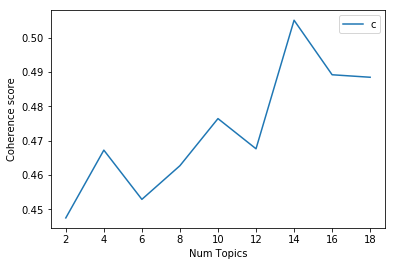

In [14]:
x = range(2, 20, 2)
plt.plot(x, coherence)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


In [11]:
coherence

[0.44750292300649164,
 0.46724714640276466,
 0.45290884015224814,
 0.462711638539108,
 0.47643250810235765,
 0.4676390113949173,
 0.505079248826435,
 0.4892018216958912,
 0.4884724641264384]

In [15]:
ntopics=4 #NOMBRE DE THEMATIQUES

generate_lda = True

# generate LDA model
import logging

if generate_lda:
    print("generate new LDA model")
    logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
    ldamodel = LdaModel(corpus, num_topics=ntopics, id2word = dico,
                                           passes=2, random_state=100, per_word_topics=True)



2020-02-27 23:49:45,606 : INFO : using symmetric alpha at 0.25
2020-02-27 23:49:45,608 : INFO : using symmetric eta at 0.25
2020-02-27 23:49:45,615 : INFO : using serial LDA version on this node
2020-02-27 23:49:45,629 : INFO : running online (multi-pass) LDA training, 4 topics, 2 passes over the supplied corpus of 7146 documents, updating model once every 2000 documents, evaluating perplexity every 7146 documents, iterating 50x with a convergence threshold of 0.001000
2020-02-27 23:49:45,630 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2020-02-27 23:49:45,632 : INFO : PROGRESS: pass 0, at document #2000/7146


generate new LDA model


2020-02-27 23:49:47,878 : INFO : merging changes from 2000 documents into a model of 7146 documents
2020-02-27 23:49:47,885 : INFO : topic #0 (0.250): 0.006*"party" + 0.005*"city" + 0.005*"today" + 0.005*"state" + 0.003*"officials" + 0.003*"leader" + 0.003*"united" + 0.003*"country" + 0.003*"opposition" + 0.003*"minister"
2020-02-27 23:49:47,887 : INFO : topic #1 (0.250): 0.009*"party" + 0.007*"state" + 0.005*"today" + 0.004*"city" + 0.004*"former" + 0.003*"officials" + 0.003*"public" + 0.003*"mayor" + 0.003*"democratic" + 0.003*"leader"
2020-02-27 23:49:47,889 : INFO : topic #2 (0.250): 0.006*"party" + 0.006*"city" + 0.005*"state" + 0.004*"today" + 0.003*"democratic" + 0.003*"mayor" + 0.003*"soviet" + 0.003*"officials" + 0.003*"leader" + 0.003*"time"
2020-02-27 23:49:47,891 : INFO : topic #3 (0.250): 0.006*"party" + 0.005*"state" + 0.004*"today" + 0.004*"city" + 0.003*"many" + 0.003*"minister" + 0.003*"time" + 0.003*"general" + 0.003*"election" + 0.003*"first"
2020-02-27 23:49:47,892 

2020-02-27 23:50:07,881 : INFO : topic #0 (0.250): 0.007*"united" + 0.006*"military" + 0.006*"minister" + 0.005*"today" + 0.005*"party" + 0.005*"country" + 0.004*"prime" + 0.004*"states" + 0.004*"aristide" + 0.004*"officials"
2020-02-27 23:50:07,883 : INFO : topic #1 (0.250): 0.019*"city" + 0.009*"state" + 0.008*"council" + 0.008*"mayor" + 0.007*"york" + 0.005*"commission" + 0.005*"board" + 0.004*"members" + 0.004*"yesterday" + 0.004*"public"
2020-02-27 23:50:07,885 : INFO : topic #2 (0.250): 0.010*"city" + 0.010*"mayor" + 0.006*"giuliani" + 0.005*"state" + 0.005*"york" + 0.004*"dinkins" + 0.004*"first" + 0.003*"office" + 0.003*"like" + 0.003*"ms"
2020-02-27 23:50:07,886 : INFO : topic #3 (0.250): 0.014*"party" + 0.006*"yeltsin" + 0.005*"soviet" + 0.005*"parliament" + 0.005*"minister" + 0.004*"today" + 0.004*"country" + 0.004*"congress" + 0.004*"communist" + 0.003*"power"
2020-02-27 23:50:07,888 : INFO : topic diff=0.336550, rho=0.423600


In [16]:
ldamodel.show_topics(formatted=False)#AFFICHAGE DES THÉMATIQUES EXTRAITE

[(0,
  [('united', 0.006688666),
   ('military', 0.005930156),
   ('minister', 0.005596524),
   ('today', 0.0053671338),
   ('party', 0.005066848),
   ('country', 0.0049804836),
   ('prime', 0.003768504),
   ('states', 0.0037111717),
   ('aristide', 0.003601711),
   ('officials', 0.0035425674)]),
 (1,
  [('city', 0.018841833),
   ('state', 0.008798785),
   ('council', 0.007818628),
   ('mayor', 0.0077906223),
   ('york', 0.007213931),
   ('commission', 0.005218311),
   ('board', 0.005137236),
   ('members', 0.0043597985),
   ('yesterday', 0.0041427794),
   ('public', 0.003869966)]),
 (2,
  [('city', 0.009746566),
   ('mayor', 0.009560289),
   ('giuliani', 0.005985333),
   ('state', 0.0047755893),
   ('york', 0.004568377),
   ('dinkins', 0.0042434866),
   ('first', 0.0037184681),
   ('office', 0.0034703326),
   ('like', 0.003137647),
   ('ms', 0.0029991146)]),
 (3,
  [('party', 0.01360608),
   ('yeltsin', 0.0056856903),
   ('soviet', 0.004821471),
   ('parliament', 0.0047590905),
   ('m

In [93]:
Lambda=0.8 # Seuil à fixer pour diminuer les intersection 

In [209]:

ldamodel=ldamodel
corpus=corpus
texts=doc_set
article_topics_df = pd.DataFrame()

# Prendre La première thematique majorithiare et la deuxième 
i=0
for i, row in enumerate(ldamodel[corpus]):
    #print(row)            
    row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
    #print(row)
    # Get the Dominant topic, Perc Contribution and Keywords for each document
    #print(i,"len(article_topics_df)")

    for j, (topic_num, prop_topic) in enumerate(row):
        #print(j)

        if j == 0:  # => first dominant topic
            wp = ldamodel.show_topic(topic_num)
            topic_keywords_first = ", ".join([word for word, prop in wp])
            topic_num_first=topic_num
            prop_topic_first=prop_topic
            #print(j)
        else:
            if j==1:# second dominant topic
                prop_topic_second=prop_topic  
                if round(prop_topic_second,4) > Lambda:## jeter les second thematique endessous du seuil
                    #print(round(prop_topic_first,4),"*")
                    wp = ldamodel.show_topic(topic_num)
                    topic_keywords_second = ", ".join([word for word, prop in wp])
                    topic_num_second=topic_num
                else:
                    topic_num_second=ntopics # Si prop_topic_second<Lamb => scnd Topic =ntopics qui ne va pas etre
                    prop_topic_second=0      # conciderer comme une thématique et la list des mots clés vide
                    topic_keywords_second=[]                        


    article_topics_df = article_topics_df.append(pd.Series([int(topic_num_first), round(prop_topic_first,4), topic_keywords_first,int(topic_num_second), round(prop_topic_second,4), topic_keywords_second]), ignore_index=True)       
    topic_num_second=ntopics
    prop_topic_second=0
    topic_keywords_second=[]
    #print(j,"#")
                #print(i,"len(article_topics_df) :",len(article_topics_df)," j:",j)






In [210]:
# Add original text to the end of the output
titles = pd.Series(doc_titles)
dates=pd.Series(doc_dates)
article_topics_df = pd.concat([article_topics_df, titles,dates], axis=1)


In [211]:
article_topics_df.columns = ['First_Dominant_Topic', 'Perc_Contribution_First', 'Topic_Keywords_First','First_Dominant_Scnd', 'Perc_Contribution_Scnd', 'Topic_Keywords_Scnd','Title','Date']


In [244]:
article_topics_df.head(20)

,First_Dominant_Topic,Perc_Contribution_First,Topic_Keywords_First,First_Dominant_Scnd,Perc_Contribution_Scnd,Topic_Keywords_Scnd,Title,Date
0,2.0,0.9954,"city, mayor, giuliani, state, york, dinkins, f...",4.0,0.0000,[],STATE'S LEADERS ARE SWORN IN ON EVE OF '87,1987-01-01
1,2.0,0.9987,"city, mayor, giuliani, state, york, dinkins, f...",4.0,0.0000,[],SECOND INAUGUAL BY CUOMO SUMS UP ACCOMPLISHMENTS,1987-01-02
2,2.0,0.9858,"city, mayor, giuliani, state, york, dinkins, f...",4.0,0.0000,[],ALBANY PAGEANT: POMP AND POLITICS,1987-01-02
3,2.0,0.9969,"city, mayor, giuliani, state, york, dinkins, f...",4.0,0.0000,[],LUNDINE OPTIMISTIC ABOUT NEW ROLE,1987-01-02
4,1.0,0.9091,"city, state, council, mayor, york, commission,...",4.0,0.0000,[],Let's Scrap That Indefensible Board of Estimate,1987-01-02
5,1.0,0.9959,"city, state, council, mayor, york, commission,...",4.0,0.0000,[],In Lieu of the Lulu,1987-01-02
6,0.0,0.7734,"united, military, minister, today, party, coun...",4.0,0.0000,[],LEADERS AREN'T NAMED,1987-01-02
7,2.0,0.8715,"city, mayor, giuliani, state, york, dinkins, f...",4.0,0.0000,[],TRANSCRIPT OF CUOMO'S INAUGURAL ADDRESS FOR HI...,1987-01-02
8,2.0,0.7900,"city, mayor, giuliani, state, york, dinkins, f...",4.0,0.0000,[],"KOHL'S WRONG TAPE, AND THE CABBAGE PUN",1987-01-02
9,3.0,0.5775,"party, yeltsin, soviet, parliament, minister, ...",0.0,0.4215,"united, military, minister, today, party, coun...",BEHIND CHINA'S PROTESTS,1987-01-03


In [217]:
set((article_topics_df[article_topics_df['First_Dominant_Topic']==3]).Topic_Keywords_First)

{'party, yeltsin, soviet, parliament, minister, today, country, congress, communist, power'}

## Creer une collection de document par thémtique majoritaire

In [32]:
First_T=set(article_topics_df.First_Dominant_Topic)

topics=[t for t in First_T]
topic_docs=[pd.DataFrame() for t in First_T]
j=0
for t in topics:
    #print(t,"topic")
    for i in range(1000):   
        #if article_topics_df[i]==t:
        if (article_topics_df['First_Dominant_Topic'][i])==t or (article_topics_df['First_Dominant_Scnd'][i])==t :
            (topic_docs[int(t)]).append(article_topics_df[i:i+1])
            (topic_docs[int(t)]) = (topic_docs[int(t)]).append(article_topics_df[i:i+1], ignore_index=False)       
            
            #print(int(t),t,article_topics_df['First_Dominant_Topic'][i])

    

In [33]:
topic_docs[0]

,First_Dominant_Topic,Perc_Contribution_First,Topic_Keywords_First,First_Dominant_Scnd,Perc_Contribution_Scnd,Topic_Keywords_Scnd,Title,Date
6,0.0,0.7733,"united, military, minister, today, party, coun...",4.0,0.0000,[],LEADERS AREN'T NAMED,1987-01-02
16,0.0,0.5356,"united, military, minister, today, party, coun...",4.0,0.0000,[],AQUINO IS WELCOMED ON CAMPAIGN TRAIL,1987-01-05
17,0.0,0.9955,"united, military, minister, today, party, coun...",4.0,0.0000,[],BEIJING POSTER ASKS A DENG REPLY,1987-01-05
20,0.0,0.9038,"united, military, minister, today, party, coun...",4.0,0.0000,[],SOLARZ MEETS WITH PHILIPPINE COMMUNIST LEADERS,1987-01-06
24,0.0,0.4649,"united, military, minister, today, party, coun...",3.0,0.4558,"party, yeltsin, soviet, parliament, minister, ...",MANILA AND REBELS REACH AGREEMENT ON TALKS,1987-01-07
27,0.0,0.9720,"united, military, minister, today, party, coun...",4.0,0.0000,[],Gabon's Cabinet Resigns,1987-01-07
31,1.0,0.4748,"city, state, council, mayor, york, commission,...",0.0,0.4693,"united, military, minister, today, party, coun...",Senate Panel's Report Omitted Bush Meeting,1987-01-08
44,0.0,0.7512,"united, military, minister, today, party, coun...",4.0,0.0000,[],CHINA OUSTS UNIVERSITY SCIENTIST WHO ADVOCATED...,1987-01-13
49,0.0,0.5275,"united, military, minister, today, party, coun...",4.0,0.0000,[],"ELECTION UNLIKELY IN '87, NICARAGUA OFFICIAL SAYS",1987-01-14
51,0.0,0.7448,"united, military, minister, today, party, coun...",4.0,0.0000,[],CHINA EXPELS A TOP SHANGHAI WRITER FROM PARTY,1987-01-15


### Création des arcs

 Data est un ensemble de noeuds source -> destination et sa couleur qui change pas pour une mm thematique 

In [35]:
colors_edges=range(ntopics)
ntopics

4

In [70]:
##création des arcs 
Data=pd.DataFrame()
for j in range(len(topic_docs)):
    for i in range((len(topic_docs[j])-1)):
        source=int((topic_docs[j][i:(i+1)]).index.values)
        dest=int((topic_docs[j][(i+1):(i+2)]).index.values)
        #print(source,dest)
        Data=Data.append(pd.Series([source,dest,(j+10),j]), ignore_index=True) 
        
        #article_topics_df = article_topics_df.append(pd.Series([int(topic_num_first), round(prop_topic_first,4), topic_keywords_first,int(topic_num_second), round(prop_topic_second,4), topic_keywords_second]), ignore_index=True)       
Data.columns = ['source', 'destination', 'color','topic']

In [63]:
Data.tail() # edges

,source,destination,color,topic
1022,972.0,979.0,23.0,3.0
1023,979.0,984.0,23.0,3.0
1024,984.0,985.0,23.0,3.0
1025,985.0,986.0,23.0,3.0
1026,986.0,993.0,23.0,3.0


### Selection des Thematiques

In [71]:
Data_copy=pd.concat([Data[Data['topic']==2],Data[Data['topic']==3]],axis=0 )

In [46]:
len(Data[Data['topic']==0]),len(Data[Data['topic']==1]),len(Data[Data['topic']==2]),len(Data[Data['topic']==3])

(333, 314, 105, 275)

### Creation du graphe

In [72]:
g = nx.Graph()
# Add edges
for i, elrow in Data_copy.iterrows():
    g.add_edge(elrow[0], elrow[1], attr_dict=elrow[2:].to_dict())
"""# Add node attributes
for i, nlrow in nodelist.iterrows():
    #g.nodes[nlrow['id']].update(nlrow[1:].to_dict())
    print(nlrow[1:].to_dict())"""
nodes = list(g.nodes()) # type cast to list in order to make compatible with networkx 1.11 and 2.0
edges = list(g.edges(data=True)) # for nx 2.0, returns an "EdgeView" object rather than an iterable

labels={}
for i , nlrow in article_topics_df.iterrows():
    for n in nodes:
        if int(n)==i:
            labels[n]=(nlrow[-2])

# define the initial positions of the nodes using networkx's spring_layout function, and add to the nodes_dict.
pos = nx.spring_layout(g)
nodes_dict = [{"id":labels[n],
              "x":pos[n][0]*1000,
              "y":pos[n][1]*1000,
              "label":n} for n in nodes]
node_map = dict(zip(nodes,range(len(nodes))))  # map to indices for source/target in edges

"""# map colors to edges based on degree
edge_to_color = visJS_module.return_edge_to_color(g,field_to_map='color',cmap=mpl.cm.jet,alpha = 1.0, color_vals_transform = None,ceil_val=10,
                        vmin=0,vmax=60)

# per edge attributes
edges_dict = [{"source":node_map[edges[i][0]], "target":node_map[edges[i][1]], 
              "color":'red'} for i in range(len(edges))]"""
#"color":edges[i][2]['color']

'# map colors to edges based on degree\nedge_to_color = visJS_module.return_edge_to_color(g,field_to_map=\'color\',cmap=mpl.cm.jet,alpha = 1.0, color_vals_transform = None,ceil_val=10,\n                        vmin=0,vmax=60)\n\n# per edge attributes\nedges_dict = [{"source":node_map[edges[i][0]], "target":node_map[edges[i][1]], \n              "color":\'red\'} for i in range(len(edges))]'

In [57]:
(edges[2][2]['color'])

12.0

In [73]:
edge_to_color = visJS_module.return_edge_to_color(g,field_to_map='color',cmap=mpl.cm.jet,alpha = 0.40, color_vals_transform = None,ceil_val=10,
                        vmin=0,vmax=20)
#edge_to_color[(edges[0][0],edges[0][1])]
# per edge attributes
edges_dict = [{"source":node_map[edges[i][0]], "target":node_map[edges[i][1]], 
              "color":edge_to_color[(edges[i][0],edges[i][1])]} for i in range(len(edges))]

## Affichage de notre metromap pour les documents

In [140]:
"""visJS2jupyter.visJS_module.visjs_network(nodes_dict,
                                         edges_dict,
                                         edge_arrow_to=True,
                                         edge_width=20,
                                         node_size_multiplier=20,
                                         physics_enabled=True,
                                         min_velocity=1,
                                         max_velocity=20,
                                         min_label_size=20,
                                         max_label_size=35,
                                         graph_title = 'Metro Map for documents belonging to topic 2 and 3'+' '
                                        
                                        
                                            
                                        )"""
## pour l'affichege de ce graphe il faux enlever l'affichage du mm type de graphe par raport au clusters 
## pour avoir une vison plus clair de l'evolution d'une thématique agrandir le graphe apres l'avoir executé 
## ça permet d'afficher les titres de chaque noeudx , sinn en cliquant sur le neoud

"visJS2jupyter.visJS_module.visjs_network(nodes_dict,\n                                         edges_dict,\n                                         edge_arrow_to=True,\n                                         edge_width=20,\n                                         node_size_multiplier=20,\n                                         physics_enabled=True,\n                                         min_velocity=1,\n                                         max_velocity=20,\n                                         min_label_size=20,\n                                         max_label_size=35,\n                                         graph_title = 'Metro Map for documents belonging to topic 2 and 3'+' '\n                                        \n                                        \n                                            \n                                        )"

In [75]:
df2=pd.concat([df.second_classifier,article_topics_df.loc[:,['First_Dominant_Topic','Perc_Contribution_First','First_Dominant_Scnd','Perc_Contribution_Scnd','Date','Title']]],axis=1)

In [76]:
df2.head()

,second_classifier,First_Dominant_Topic,Perc_Contribution_First,First_Dominant_Scnd,Perc_Contribution_Scnd,Date,Title
0,LIEUTENANT GOVERNORS (US),2.0,0.9954,4.0,0.0,1987-01-01,STATE'S LEADERS ARE SWORN IN ON EVE OF '87
1,INAUGURATIONS,2.0,0.9987,4.0,0.0,1987-01-02,SECOND INAUGUAL BY CUOMO SUMS UP ACCOMPLISHMENTS
2,INAUGURATIONS,2.0,0.9859,4.0,0.0,1987-01-02,ALBANY PAGEANT: POMP AND POLITICS
3,LIEUTENANT GOVERNORS (US),2.0,0.9969,4.0,0.0,1987-01-02,LUNDINE OPTIMISTIC ABOUT NEW ROLE
4,Letter,1.0,0.9094,4.0,0.0,1987-01-02,Let's Scrap That Indefensible Board of Estimate


In [21]:
df2[df2.second_classifier==' ETHICS']


,second_classifier,First_Dominant_Topic,Perc_Contribution_First,Date,Title
10,ETHICS,17.0,0.4808,1987-01-04,"Koch Seems Little Damaged, Except for Loss of ..."
11,ETHICS,6.0,0.5435,1987-01-04,A Yearlong Look at Government's Underside
26,ETHICS,6.0,0.4811,1987-01-07,TRANSPORTATION AGENCY HEARS GIULIANI'S ADVICE
35,ETHICS,14.0,0.6456,1987-01-09,LEGACY OF THE SCANDALS: NEW RULES AND MORE CON...
37,ETHICS,6.0,0.3698,1987-01-09,"AROUND QUEENS BOROUGH HALL, MANES MYSTERY LINGERS"
39,ETHICS,6.0,0.9896,1987-01-10,Correction
42,ETHICS,11.0,0.4266,1987-01-12,KOCH DISCUSSES MYERSON'S ROLE AS CITY OFFICIAL
48,ETHICS,14.0,0.4391,1987-01-14,AT ISSUE IS HER USE OF 5TH AMENDMENT
56,ETHICS,8.0,0.6877,1987-01-15,7 WILL BE NAMED TO ETHICS PANEL WITH WIDE POWE...
60,ETHICS,9.0,0.3632,1987-01-16,U.S. TRIAL STARTS FOR EX-OFFICIAL OF QUEENS PARTY


In [77]:
df2.tail()

,second_classifier,First_Dominant_Topic,Perc_Contribution_First,First_Dominant_Scnd,Perc_Contribution_Scnd,Date,Title
7141,Letter,3.0,0.8418,4.0,0.0,1994-07-01,Before We Applaud France's Mission to Rwanda;R...
7142,NEWS AND NEWS MEDIA,2.0,0.6248,4.0,0.0,1994-07-01,Deputy Mayor's Remark Draws Racial Fire
7143,ELECTIONS,3.0,0.9989,4.0,0.0,1994-07-01,Japan's Realignment: Reformers Remain Confident
7144,Top/News,3.0,0.9928,4.0,0.0,1994-07-02,Party in Italy Picks Leader
7145,ELECTIONS,2.0,0.9991,4.0,0.0,1994-07-02,"Bland but Tough, Gov. Wilson Uses Lessons of N..."


## Preparation des variables pour le clustering 

### Calcul de la date continue (Nombre de jour par rapport à today

In [224]:
import time 
from datetime import datetime,timedelta
import datetime as dt
from datetime import date
data={'col':['Number of Days']}
ColumnList=pd.DataFrame(data=data)
dates=df2[['Date']]
today=date(2020,2,18)
for i in range(len(df2[['Date']])):
    tdate=(datetime.strptime(dates.iloc[i][0],'%Y-%m-%d').date())
    NumDays=(today-tdate).days
    dates.set_value(i,ColumnList.iloc[0][0],NumDays)
    #print(dates.iloc[i])
    print(i,tdate,NumDays)

/home/toutou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
/home/toutou/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/toutou/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


0 1987-01-01 12101
1 1987-01-02 12100
2 1987-01-02 12100
3 1987-01-02 12100
4 1987-01-02 12100
5 1987-01-02 12100
6 1987-01-02 12100
7 1987-01-02 12100
8 1987-01-02 12100
9 1987-01-03 12099
10 1987-01-04 12098
11 1987-01-04 12098
12 1987-01-04 12098
13 1987-01-04 12098
14 1987-01-04 12098
15 1987-01-05 12097
16 1987-01-05 12097
17 1987-01-05 12097
18 1987-01-06 12096
19 1987-01-06 12096
20 1987-01-06 12096
21 1987-01-06 12096
22 1987-01-06 12096
23 1987-01-07 12095
24 1987-01-07 12095
25 1987-01-07 12095
26 1987-01-07 12095
27 1987-01-07 12095
28 1987-01-08 12094
29 1987-01-08 12094
30 1987-01-08 12094
31 1987-01-08 12094
32 1987-01-08 12094
33 1987-01-09 12093
34 1987-01-09 12093
35 1987-01-09 12093
36 1987-01-09 12093
37 1987-01-09 12093
38 1987-01-09 12093
39 1987-01-10 12092
40 1987-01-11 12091
41 1987-01-11 12091
42 1987-01-12 12090
43 1987-01-13 12089
44 1987-01-13 12089
45 1987-01-13 12089
46 1987-01-13 12089
47 1987-01-14 12088
48 1987-01-14 12088
49 1987-01-14 12088
50 1987-01

575 1987-05-15 11967
576 1987-05-15 11967
577 1987-05-15 11967
578 1987-05-15 11967
579 1987-05-16 11966
580 1987-05-18 11964
581 1987-05-18 11964
582 1987-05-18 11964
583 1987-05-19 11963
584 1987-05-19 11963
585 1987-05-19 11963
586 1987-05-19 11963
587 1987-05-19 11963
588 1987-05-20 11962
589 1987-05-20 11962
590 1987-05-20 11962
591 1987-05-20 11962
592 1987-05-20 11962
593 1987-05-21 11961
594 1987-05-21 11961
595 1987-05-21 11961
596 1987-05-21 11961
597 1987-05-22 11960
598 1987-05-22 11960
599 1987-05-23 11959
600 1987-05-24 11958
601 1987-05-24 11958
602 1987-05-24 11958
603 1987-05-24 11958
604 1987-05-24 11958
605 1987-05-25 11957
606 1987-05-25 11957
607 1987-05-25 11957
608 1987-05-26 11956
609 1987-05-26 11956
610 1987-05-26 11956
611 1987-05-26 11956
612 1987-05-26 11956
613 1987-05-27 11955
614 1987-05-27 11955
615 1987-05-27 11955
616 1987-05-27 11955
617 1987-05-27 11955
618 1987-05-28 11954
619 1987-05-28 11954
620 1987-05-28 11954
621 1987-05-28 11954
622 1987-05-2

1070 1987-09-04 11855
1071 1987-09-04 11855
1072 1987-09-04 11855
1073 1987-09-04 11855
1074 1987-09-04 11855
1075 1987-09-04 11855
1076 1987-09-05 11854
1077 1987-09-05 11854
1078 1987-09-06 11853
1079 1987-09-06 11853
1080 1987-09-08 11851
1081 1987-09-08 11851
1082 1987-09-08 11851
1083 1987-09-09 11850
1084 1987-09-09 11850
1085 1987-09-09 11850
1086 1987-09-09 11850
1087 1987-09-09 11850
1088 1987-09-09 11850
1089 1987-09-10 11849
1090 1987-09-10 11849
1091 1987-09-10 11849
1092 1987-09-10 11849
1093 1987-09-10 11849
1094 1987-09-10 11849
1095 1987-09-10 11849
1096 1987-09-10 11849
1097 1987-09-10 11849
1098 1987-09-10 11849
1099 1987-09-11 11848
1100 1987-09-11 11848
1101 1987-09-11 11848
1102 1987-09-11 11848
1103 1987-09-12 11847
1104 1987-09-13 11846
1105 1987-09-13 11846
1106 1987-09-14 11845
1107 1987-09-14 11845
1108 1987-09-14 11845
1109 1987-09-14 11845
1110 1987-09-14 11845
1111 1987-09-14 11845
1112 1987-09-15 11844
1113 1987-09-15 11844
1114 1987-09-15 11844
1115 1987-

1646 1988-02-24 11682
1647 1988-02-25 11681
1648 1988-02-25 11681
1649 1988-02-25 11681
1650 1988-02-25 11681
1651 1988-02-25 11681
1652 1988-02-25 11681
1653 1988-02-25 11681
1654 1988-02-25 11681
1655 1988-02-25 11681
1656 1988-02-25 11681
1657 1988-02-25 11681
1658 1988-02-27 11679
1659 1988-02-27 11679
1660 1988-02-27 11679
1661 1988-02-27 11679
1662 1988-02-27 11679
1663 1988-02-27 11679
1664 1988-02-28 11678
1665 1988-02-28 11678
1666 1988-02-28 11678
1667 1988-02-28 11678
1668 1988-02-28 11678
1669 1988-02-28 11678
1670 1988-02-28 11678
1671 1988-03-01 11676
1672 1988-03-01 11676
1673 1988-03-03 11674
1674 1988-03-03 11674
1675 1988-03-03 11674
1676 1988-03-03 11674
1677 1988-03-03 11674
1678 1988-03-04 11673
1679 1988-03-04 11673
1680 1988-03-06 11671
1681 1988-03-06 11671
1682 1988-03-09 11668
1683 1988-03-11 11666
1684 1988-03-12 11665
1685 1988-03-13 11664
1686 1988-03-13 11664
1687 1988-03-13 11664
1688 1988-03-13 11664
1689 1988-03-14 11663
1690 1988-03-14 11663
1691 1988-

2114 1989-01-15 11356
2115 1989-01-15 11356
2116 1989-01-16 11355
2117 1989-01-17 11354
2118 1989-01-18 11353
2119 1989-01-18 11353
2120 1989-01-22 11349
2121 1989-01-22 11349
2122 1989-01-22 11349
2123 1989-01-22 11349
2124 1989-01-24 11347
2125 1989-01-27 11344
2126 1989-01-28 11343
2127 1989-01-28 11343
2128 1989-01-29 11342
2129 1989-01-29 11342
2130 1989-01-29 11342
2131 1989-02-01 11339
2132 1989-02-01 11339
2133 1989-02-01 11339
2134 1989-02-01 11339
2135 1989-02-04 11336
2136 1989-02-05 11335
2137 1989-02-08 11332
2138 1989-02-08 11332
2139 1989-02-09 11331
2140 1989-02-09 11331
2141 1989-02-10 11330
2142 1989-02-10 11330
2143 1989-02-10 11330
2144 1989-02-10 11330
2145 1989-02-10 11330
2146 1989-02-11 11329
2147 1989-02-11 11329
2148 1989-02-15 11325
2149 1989-02-15 11325
2150 1989-02-15 11325
2151 1989-02-15 11325
2152 1989-02-21 11319
2153 1989-02-25 11315
2154 1989-02-26 11314
2155 1989-02-26 11314
2156 1989-02-28 11312
2157 1989-03-02 11310
2158 1989-03-03 11309
2159 1989-

2567 1989-08-20 11139
2568 1989-08-20 11139
2569 1989-08-20 11139
2570 1989-08-20 11139
2571 1989-08-20 11139
2572 1989-08-20 11139
2573 1989-08-20 11139
2574 1989-08-20 11139
2575 1989-08-20 11139
2576 1989-08-21 11138
2577 1989-08-21 11138
2578 1989-08-21 11138
2579 1989-08-21 11138
2580 1989-08-22 11137
2581 1989-08-22 11137
2582 1989-08-22 11137
2583 1989-08-24 11135
2584 1989-08-24 11135
2585 1989-08-24 11135
2586 1989-08-24 11135
2587 1989-08-24 11135
2588 1989-08-25 11134
2589 1989-08-26 11133
2590 1989-08-26 11133
2591 1989-08-27 11132
2592 1989-08-27 11132
2593 1989-08-27 11132
2594 1989-08-27 11132
2595 1989-08-27 11132
2596 1989-08-27 11132
2597 1989-08-27 11132
2598 1989-08-27 11132
2599 1989-08-27 11132
2600 1989-08-27 11132
2601 1989-08-28 11131
2602 1989-08-28 11131
2603 1989-08-29 11130
2604 1989-08-29 11130
2605 1989-08-30 11129
2606 1989-08-30 11129
2607 1989-08-30 11129
2608 1989-08-30 11129
2609 1989-08-30 11129
2610 1989-08-31 11128
2611 1989-09-01 11127
2612 1989-

3019 1990-01-02 11004
3020 1990-01-02 11004
3021 1990-01-02 11004
3022 1990-01-02 11004
3023 1990-01-02 11004
3024 1990-01-02 11004
3025 1990-01-02 11004
3026 1990-01-02 11004
3027 1990-01-03 11003
3028 1990-01-03 11003
3029 1990-01-03 11003
3030 1990-01-03 11003
3031 1990-01-03 11003
3032 1990-01-03 11003
3033 1990-01-03 11003
3034 1990-01-04 11002
3035 1990-01-04 11002
3036 1990-01-04 11002
3037 1990-01-05 11001
3038 1990-01-05 11001
3039 1990-01-07 10999
3040 1990-01-07 10999
3041 1990-01-07 10999
3042 1990-01-07 10999
3043 1990-01-07 10999
3044 1990-01-08 10998
3045 1990-01-08 10998
3046 1990-01-08 10998
3047 1990-01-08 10998
3048 1990-01-08 10998
3049 1990-01-08 10998
3050 1990-01-08 10998
3051 1990-01-08 10998
3052 1990-01-08 10998
3053 1990-01-09 10997
3054 1990-01-10 10996
3055 1990-01-11 10995
3056 1990-01-11 10995
3057 1990-01-12 10994
3058 1990-01-12 10994
3059 1990-01-13 10993
3060 1990-01-14 10992
3061 1990-01-14 10992
3062 1990-01-14 10992
3063 1990-01-14 10992
3064 1990-

3479 1990-07-06 10819
3480 1990-07-06 10819
3481 1990-07-06 10819
3482 1990-07-07 10818
3483 1990-07-07 10818
3484 1990-07-07 10818
3485 1990-07-07 10818
3486 1990-07-07 10818
3487 1990-07-07 10818
3488 1990-07-08 10817
3489 1990-07-08 10817
3490 1990-07-08 10817
3491 1990-07-08 10817
3492 1990-07-08 10817
3493 1990-07-09 10816
3494 1990-07-09 10816
3495 1990-07-10 10815
3496 1990-07-10 10815
3497 1990-07-11 10814
3498 1990-07-11 10814
3499 1990-07-11 10814
3500 1990-07-11 10814
3501 1990-07-12 10813
3502 1990-07-12 10813
3503 1990-07-13 10812
3504 1990-07-13 10812
3505 1990-07-13 10812
3506 1990-07-14 10811
3507 1990-07-14 10811
3508 1990-07-14 10811
3509 1990-07-14 10811
3510 1990-07-14 10811
3511 1990-07-15 10810
3512 1990-07-15 10810
3513 1990-07-15 10810
3514 1990-07-15 10810
3515 1990-07-15 10810
3516 1990-07-15 10810
3517 1990-07-15 10810
3518 1990-07-16 10809
3519 1990-07-17 10808
3520 1990-07-17 10808
3521 1990-07-19 10806
3522 1990-07-22 10803
3523 1990-07-23 10802
3524 1990-

3939 1990-12-29 10643
3940 1990-12-29 10643
3941 1990-12-29 10643
3942 1990-12-29 10643
3943 1990-12-29 10643
3944 1990-12-30 10642
3945 1990-12-31 10641
3946 1990-12-31 10641
3947 1991-01-01 10640
3948 1991-01-01 10640
3949 1991-01-03 10638
3950 1991-01-05 10636
3951 1991-01-06 10635
3952 1991-01-06 10635
3953 1991-01-06 10635
3954 1991-01-07 10634
3955 1991-01-09 10632
3956 1991-01-09 10632
3957 1991-01-10 10631
3958 1991-01-10 10631
3959 1991-01-11 10630
3960 1991-01-11 10630
3961 1991-01-12 10629
3962 1991-01-12 10629
3963 1991-01-12 10629
3964 1991-01-12 10629
3965 1991-01-12 10629
3966 1991-01-13 10628
3967 1991-01-13 10628
3968 1991-01-14 10627
3969 1991-01-14 10627
3970 1991-01-14 10627
3971 1991-01-14 10627
3972 1991-01-14 10627
3973 1991-01-14 10627
3974 1991-01-14 10627
3975 1991-01-15 10626
3976 1991-01-15 10626
3977 1991-01-15 10626
3978 1991-01-16 10625
3979 1991-01-17 10624
3980 1991-01-17 10624
3981 1991-01-17 10624
3982 1991-01-17 10624
3983 1991-01-17 10624
3984 1991-

4440 1991-07-03 10457
4441 1991-07-03 10457
4442 1991-07-03 10457
4443 1991-07-03 10457
4444 1991-07-03 10457
4445 1991-07-04 10456
4446 1991-07-05 10455
4447 1991-07-05 10455
4448 1991-07-05 10455
4449 1991-07-06 10454
4450 1991-07-07 10453
4451 1991-07-07 10453
4452 1991-07-07 10453
4453 1991-07-07 10453
4454 1991-07-07 10453
4455 1991-07-08 10452
4456 1991-07-08 10452
4457 1991-07-08 10452
4458 1991-07-08 10452
4459 1991-07-08 10452
4460 1991-07-09 10451
4461 1991-07-09 10451
4462 1991-07-10 10450
4463 1991-07-11 10449
4464 1991-07-11 10449
4465 1991-07-12 10448
4466 1991-07-12 10448
4467 1991-07-14 10446
4468 1991-07-17 10443
4469 1991-07-17 10443
4470 1991-07-18 10442
4471 1991-07-19 10441
4472 1991-07-19 10441
4473 1991-07-20 10440
4474 1991-07-20 10440
4475 1991-07-20 10440
4476 1991-07-20 10440
4477 1991-07-21 10439
4478 1991-07-22 10438
4479 1991-07-22 10438
4480 1991-07-23 10437
4481 1991-07-24 10436
4482 1991-07-24 10436
4483 1991-07-24 10436
4484 1991-07-25 10435
4485 1991-

4888 1991-12-10 10297
4889 1991-12-10 10297
4890 1991-12-10 10297
4891 1991-12-10 10297
4892 1991-12-11 10296
4893 1991-12-11 10296
4894 1991-12-12 10295
4895 1991-12-12 10295
4896 1991-12-12 10295
4897 1991-12-13 10294
4898 1991-12-13 10294
4899 1991-12-14 10293
4900 1991-12-14 10293
4901 1991-12-14 10293
4902 1991-12-14 10293
4903 1991-12-14 10293
4904 1991-12-14 10293
4905 1991-12-15 10292
4906 1991-12-15 10292
4907 1991-12-15 10292
4908 1991-12-15 10292
4909 1991-12-15 10292
4910 1991-12-15 10292
4911 1991-12-15 10292
4912 1991-12-15 10292
4913 1991-12-15 10292
4914 1991-12-15 10292
4915 1991-12-15 10292
4916 1991-12-15 10292
4917 1991-12-16 10291
4918 1991-12-16 10291
4919 1991-12-17 10290
4920 1991-12-17 10290
4921 1991-12-17 10290
4922 1991-12-17 10290
4923 1991-12-17 10290
4924 1991-12-17 10290
4925 1991-12-18 10289
4926 1991-12-18 10289
4927 1991-12-18 10289
4928 1991-12-19 10288
4929 1991-12-19 10288
4930 1991-12-19 10288
4931 1991-12-19 10288
4932 1991-12-20 10287
4933 1991-

5419 1992-07-28 10066
5420 1992-07-28 10066
5421 1992-07-28 10066
5422 1992-07-29 10065
5423 1992-07-29 10065
5424 1992-07-30 10064
5425 1992-07-30 10064
5426 1992-07-31 10063
5427 1992-08-02 10061
5428 1992-08-02 10061
5429 1992-08-02 10061
5430 1992-08-03 10060
5431 1992-08-05 10058
5432 1992-08-05 10058
5433 1992-08-05 10058
5434 1992-08-06 10057
5435 1992-08-06 10057
5436 1992-08-11 10052
5437 1992-08-12 10051
5438 1992-08-12 10051
5439 1992-08-12 10051
5440 1992-08-16 10047
5441 1992-08-16 10047
5442 1992-08-17 10046
5443 1992-08-18 10045
5444 1992-08-18 10045
5445 1992-08-19 10044
5446 1992-08-19 10044
5447 1992-08-20 10043
5448 1992-08-21 10042
5449 1992-08-22 10041
5450 1992-08-22 10041
5451 1992-08-22 10041
5452 1992-08-23 10040
5453 1992-08-23 10040
5454 1992-08-23 10040
5455 1992-08-23 10040
5456 1992-08-23 10040
5457 1992-08-25 10038
5458 1992-08-25 10038
5459 1992-08-27 10036
5460 1992-08-28 10035
5461 1992-08-28 10035
5462 1992-08-29 10034
5463 1992-08-30 10033
5464 1992-

5868 1993-03-27 9824
5869 1993-03-27 9824
5870 1993-03-28 9823
5871 1993-03-28 9823
5872 1993-03-28 9823
5873 1993-03-28 9823
5874 1993-03-28 9823
5875 1993-03-28 9823
5876 1993-03-28 9823
5877 1993-03-28 9823
5878 1993-03-28 9823
5879 1993-03-28 9823
5880 1993-03-28 9823
5881 1993-03-29 9822
5882 1993-03-29 9822
5883 1993-03-29 9822
5884 1993-03-29 9822
5885 1993-03-29 9822
5886 1993-03-29 9822
5887 1993-03-29 9822
5888 1993-03-29 9822
5889 1993-03-29 9822
5890 1993-03-30 9821
5891 1993-03-30 9821
5892 1993-03-30 9821
5893 1993-03-30 9821
5894 1993-03-31 9820
5895 1993-03-31 9820
5896 1993-03-31 9820
5897 1993-03-31 9820
5898 1993-04-01 9819
5899 1993-04-01 9819
5900 1993-04-01 9819
5901 1993-04-02 9818
5902 1993-04-02 9818
5903 1993-04-03 9817
5904 1993-04-03 9817
5905 1993-04-03 9817
5906 1993-04-03 9817
5907 1993-04-04 9816
5908 1993-04-04 9816
5909 1993-04-04 9816
5910 1993-04-05 9815
5911 1993-04-06 9814
5912 1993-04-07 9813
5913 1993-04-07 9813
5914 1993-04-07 9813
5915 1993-04-

6375 1993-09-12 9655
6376 1993-09-12 9655
6377 1993-09-12 9655
6378 1993-09-13 9654
6379 1993-09-13 9654
6380 1993-09-13 9654
6381 1993-09-13 9654
6382 1993-09-13 9654
6383 1993-09-15 9652
6384 1993-09-15 9652
6385 1993-09-15 9652
6386 1993-09-16 9651
6387 1993-09-16 9651
6388 1993-09-16 9651
6389 1993-09-17 9650
6390 1993-09-18 9649
6391 1993-09-19 9648
6392 1993-09-19 9648
6393 1993-09-19 9648
6394 1993-09-19 9648
6395 1993-09-19 9648
6396 1993-09-19 9648
6397 1993-09-19 9648
6398 1993-09-19 9648
6399 1993-09-20 9647
6400 1993-09-20 9647
6401 1993-09-20 9647
6402 1993-09-21 9646
6403 1993-09-22 9645
6404 1993-09-22 9645
6405 1993-09-22 9645
6406 1993-09-22 9645
6407 1993-09-22 9645
6408 1993-09-22 9645
6409 1993-09-22 9645
6410 1993-09-22 9645
6411 1993-09-22 9645
6412 1993-09-22 9645
6413 1993-09-22 9645
6414 1993-09-22 9645
6415 1993-09-23 9644
6416 1993-09-23 9644
6417 1993-09-23 9644
6418 1993-09-23 9644
6419 1993-09-23 9644
6420 1993-09-24 9643
6421 1993-09-24 9643
6422 1993-09-

7116 1994-06-16 9378
7117 1994-06-16 9378
7118 1994-06-16 9378
7119 1994-06-19 9375
7120 1994-06-20 9374
7121 1994-06-20 9374
7122 1994-06-21 9373
7123 1994-06-23 9371
7124 1994-06-23 9371
7125 1994-06-23 9371
7126 1994-06-24 9370
7127 1994-06-25 9369
7128 1994-06-26 9368
7129 1994-06-26 9368
7130 1994-06-26 9368
7131 1994-06-26 9368
7132 1994-06-26 9368
7133 1994-06-26 9368
7134 1994-06-27 9367
7135 1994-06-28 9366
7136 1994-06-29 9365
7137 1994-06-30 9364
7138 1994-06-30 9364
7139 1994-06-30 9364
7140 1994-06-30 9364
7141 1994-07-01 9363
7142 1994-07-01 9363
7143 1994-07-01 9363
7144 1994-07-02 9362
7145 1994-07-02 9362


In [79]:
dates.tail()
#len(dates)
#ColumnList.iloc[0]

,Date,Number of Days
7141,1994-07-01,9363.0
7142,1994-07-01,9363.0
7143,1994-07-01,9363.0
7144,1994-07-02,9362.0
7145,1994-07-02,9362.0


In [222]:
df2.head()

,second_classifier,First_Dominant_Topic,Perc_Contribution_First,First_Dominant_Scnd,Perc_Contribution_Scnd,Date,Title
0,LIEUTENANT GOVERNORS (US),2.0,0.9954,4.0,0.0,1987-01-01,STATE'S LEADERS ARE SWORN IN ON EVE OF '87
1,INAUGURATIONS,2.0,0.9987,4.0,0.0,1987-01-02,SECOND INAUGUAL BY CUOMO SUMS UP ACCOMPLISHMENTS
2,INAUGURATIONS,2.0,0.9859,4.0,0.0,1987-01-02,ALBANY PAGEANT: POMP AND POLITICS
3,LIEUTENANT GOVERNORS (US),2.0,0.9969,4.0,0.0,1987-01-02,LUNDINE OPTIMISTIC ABOUT NEW ROLE
4,Letter,1.0,0.9094,4.0,0.0,1987-01-02,Let's Scrap That Indefensible Board of Estimate


In [225]:
# Add original text to the end of the output
#Number_days=pd.Series(dates.loc[:,['Number of Days']])
#df3 = pd.concat([article_topics_df, titles,dates], axis=1)
df3=df2.loc[:,['First_Dominant_Topic','Perc_Contribution_First','First_Dominant_Scnd','second_classifier']]
df3=pd.concat([df3,dates.loc[:,['Number of Days']]],axis=1)
#df3=df3[df3.second_classifier==' ETHICS']


In [226]:
df3.tail()

,First_Dominant_Topic,Perc_Contribution_First,First_Dominant_Scnd,second_classifier,Number of Days
7141,3.0,0.8418,4.0,Letter,9363.0
7142,2.0,0.6248,4.0,NEWS AND NEWS MEDIA,9363.0
7143,3.0,0.9989,4.0,ELECTIONS,9363.0
7144,3.0,0.9928,4.0,Top/News,9362.0
7145,2.0,0.9991,4.0,ELECTIONS,9362.0


In [59]:
len(df3)

7146

In [82]:
#df4=df3.loc[:,['First_Dominant_Topic','Perc_Contribution_First','First_Dominant_Scnd','Perc_Contribution_Scnd','Number of Days']]
df4=df3.loc[:,['First_Dominant_Topic','Perc_Contribution_First','First_Dominant_Scnd','Number of Days']]

In [83]:
df4.tail()

,First_Dominant_Topic,Perc_Contribution_First,First_Dominant_Scnd,Number of Days
7141,3.0,0.8418,4.0,9363.0
7142,2.0,0.6248,4.0,9363.0
7143,3.0,0.9989,4.0,9363.0
7144,3.0,0.9928,4.0,9362.0
7145,2.0,0.9991,4.0,9362.0


# Determination du nombre de clusters en utilisant elbow

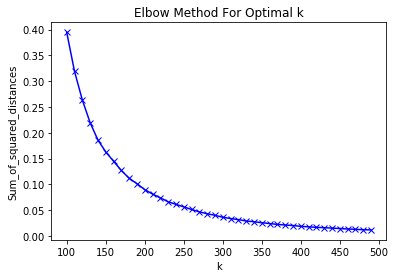

In [85]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(100,500,10)
for k in K:#nombre de clusters

    
    ###
    df4_copy=df4
    kmeans = KMeans(n_clusters=k)
    X = np.array((df4_copy.drop (['Number of Days'], 1))).astype(float)#observations
    Y = np.array(df4_copy['Number of Days'].astype(float))#poids
    wt_kmeansclus = kmeans.fit(X[0:,],sample_weight = Y[0:])
    predicted_kmeans = kmeans.predict(X[0:,], sample_weight = Y[0:])
    Sum_of_squared_distances.append(wt_kmeansclus.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## Aplication d'un clustering Kmeans biaisé par les dates sur nos observations

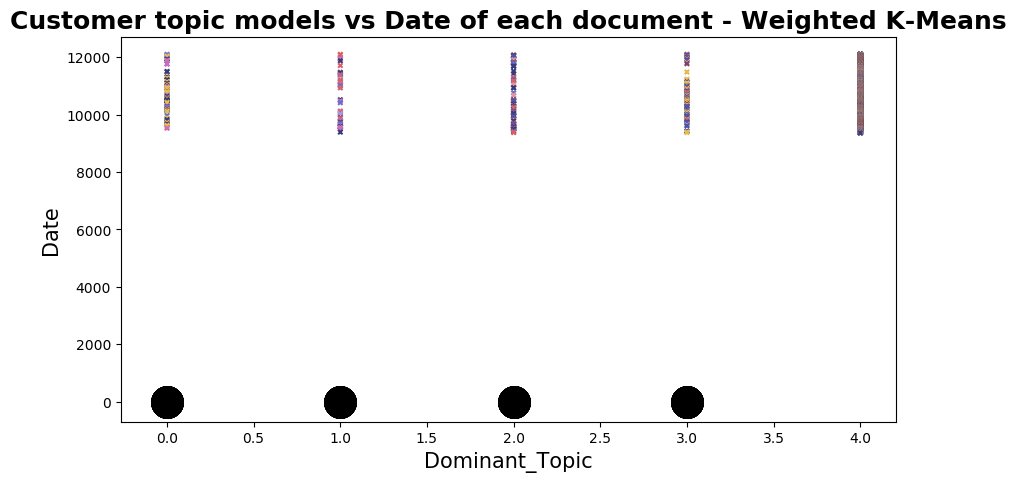

In [148]:
df4_copy=df4
kmeans = KMeans(n_clusters=150,  max_iter=1000)
X = np.array(df4_copy.drop (['Number of Days'], 1)).astype(float)
Y = np.array(df4_copy['Number of Days'].astype(float))
wt_kmeansclus = kmeans.fit(X[0:,],sample_weight = Y[0:])
predicted_kmeans = kmeans.predict(X[0:,], sample_weight = Y[0:])
plt.style.use('default')
plt.figure(figsize=(10, 5))
plt.scatter(X[0:,2], Y[0:], c=wt_kmeansclus.labels_.astype(float),s=10,cmap='tab20b',marker='x')
plt.title('Customer topic models vs Date of each document - Weighted K-Means',fontsize=18, fontweight='bold')
plt.xlabel('Dominant_Topic',fontsize=15)
plt.ylabel('Date',fontsize=15)
centers = wt_kmeansclus.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500, alpha=0.5);

In [155]:
## creation d'une nouvelle dataframe contenant le cluster attribué  
d1=df3
d2=pd.Series(wt_kmeansclus.labels_)
Titles=df2.loc[:,['Title']]
df6= pd.concat([d1.reset_index(drop=True), d2.reset_index(drop=True),Titles.reset_index(drop=True)], axis=1, ignore_index=True )
columns=list(df3.columns)
columns.append("Cluster")
columns.append("Title")


In [157]:
df6.columns=columns
df6.head()


,First_Dominant_Topic,Perc_Contribution_First,First_Dominant_Scnd,second_classifier,Number of Days,Cluster,Title
0,2.0,0.9954,4.0,LIEUTENANT GOVERNORS (US),12101.0,1,STATE'S LEADERS ARE SWORN IN ON EVE OF '87
1,2.0,0.9987,4.0,INAUGURATIONS,12100.0,1,SECOND INAUGUAL BY CUOMO SUMS UP ACCOMPLISHMENTS
2,2.0,0.9859,4.0,INAUGURATIONS,12100.0,142,ALBANY PAGEANT: POMP AND POLITICS
3,2.0,0.9969,4.0,LIEUTENANT GOVERNORS (US),12100.0,1,LUNDINE OPTIMISTIC ABOUT NEW ROLE
4,1.0,0.9094,4.0,Letter,12100.0,92,Let's Scrap That Indefensible Board of Estimate


## Création de neoudx à partir des clusters sur un echantillion d'articles relativ à un Classifier choisit(ETHICS) :

In [ ]:
clusters=[pd.DataFrame() for i in set(wt_kmeansclus.labels_)]

for i in range(len(df6)):
    for j in range(len(set(wt_kmeansclus.labels_))):
        if int(df6.iloc[i][5])==j:
            #print(i,j,int(df6.iloc[i][5]))
            clusters[j]=(clusters[j]).append(df6[i:i+1],ignore_index=False)
            #print(clusters[j])
        


In [162]:
df6.iloc[i][0]

,First_Dominant_Topic,Perc_Contribution_First,First_Dominant_Scnd,second_classifier,Number of Days,Cluster,Title
0,2.0,0.9954,4.0,LIEUTENANT GOVERNORS (US),12101.0,1,STATE'S LEADERS ARE SWORN IN ON EVE OF '87
1,2.0,0.9987,4.0,INAUGURATIONS,12100.0,1,SECOND INAUGUAL BY CUOMO SUMS UP ACCOMPLISHMENTS
2,2.0,0.9859,4.0,INAUGURATIONS,12100.0,142,ALBANY PAGEANT: POMP AND POLITICS
3,2.0,0.9969,4.0,LIEUTENANT GOVERNORS (US),12100.0,1,LUNDINE OPTIMISTIC ABOUT NEW ROLE
4,1.0,0.9094,4.0,Letter,12100.0,92,Let's Scrap That Indefensible Board of Estimate


In [112]:
d=clusters[0]['Number of Days']
d.mean()# date moyenne du cluster

10493.021739130434

In [142]:
Lambda=0.6

In [1198]:
"""grouped = c.groupby('First_Dominant_Topic')
Mean_grouped=grouped['Perc_Contribution_First'].agg(np.mean)
Sorted_mean_grouped=(Mean_grouped.sort_values(ascending=False))
First_two_mean_grouped=(Sorted_mean_grouped[:2]).to_dict()
values_two_mean_grouped=list(First_two_mean_grouped.values())
if values_two_mean_grouped[1] < Lambda:
    First_two_mean_grouped.popitem()
print((First_two_mean_grouped))"""

{11.0: 0.9049636342308738, 16.0: 0.7888000011444092, 6.0: 0.7758285786424365, 8.0: 0.6427000164985657, 2.0: 0.5249999761581421}


In [113]:
clusters_copy=clusters
for i in range(len(clusters)):
    #print(i,len(set((clusters[i])['First_Dominant_Topic'])),set((clusters[i])['First_Dominant_Topic']),len(clusters[i]))
#########
    cluster_temp=pd.DataFrame()
    Dic_cluster={}
    c=clusters[i]
    grouped = c.groupby('First_Dominant_Topic')# grouper les elms du cluster i par thématique (chaque cluster peut contenir plusieurs thématiques
    Mean_grouped=grouped['Perc_Contribution_First'].agg(np.mean) # calculer la moyenne du pourcentage de contribution 
    # de chaque group afin de trier ces elm en utilisant cette moyenne 
    Sorted_mean_grouped=(Mean_grouped.sort_values(ascending=False))
    First_two_mean_grouped=(Sorted_mean_grouped[:]).to_dict()
    values_two_mean_grouped=list(First_two_mean_grouped.values())

    #print((First_two_mean_grouped))
    ## extraction de la première thématique et de la deuxième (si elle deppasse Lambda)
    Dic_cluster[(list(First_two_mean_grouped))[0]]=values_two_mean_grouped[0]
    if len(values_two_mean_grouped)>1:
        if(values_two_mean_grouped[1]>Lambda):
            Dic_cluster[(list(First_two_mean_grouped))[1]]=values_two_mean_grouped[1]

    cluster_temp=clusters[i][(clusters[i]).First_Dominant_Topic==((list(Dic_cluster))[0])]
    if(len(list(Dic_cluster))>1):
        cluster_temp=cluster_temp.append(clusters[i][(clusters[i]).First_Dominant_Topic==((list(Dic_cluster))[1])],ignore_index=True)

        #print(len(First_two_mean_grouped))
    #print(list(Dic_cluster),Dic_cluster)

#    print(clusters[i])
    clusters[i]=cluster_temp
#    print("#")
#    print(clusters[i])

 
########
    #print(i,len(set((clusters[i])['First_Dominant_Topic'])),set((clusters[i])['First_Dominant_Topic']),len(clusters[i]))

In [116]:
set(clusters[9]['First_Dominant_Topic'])

{3.0}

## Creation des Noeudx :
groupement des clusters par thématuqe 
    
(première et deuxime si elle est prise à travers lambda)

In [119]:
#Get only the topics that are used
First_T_cluster=[]
for j in range(len(clusters)):
    for k in ((set(list(clusters[j]['First_Dominant_Topic'])))):
              First_T_cluster.append(k)


First_T_cluster=set(First_T_cluster)
topics=[int(t) for t in First_T_cluster]
topic_clusters=[[] for t in range(1+max(topics))]
 
j=0
for t in topics:
    #print(t,"topic")
    for i in range(len(clusters)):   

        #if article_topics_df[i]==t:
        for j in set(clusters[i]['First_Dominant_Topic']):
            if j==t :
                print(i,"CLuster",j,"=",t,"topic1")
                (topic_clusters[int(t)]).append(i)
        for j in set(clusters[i]['First_Dominant_Scnd']):
            if j==t :
                print(i,"CLuster",j,"=",t,"topic2")
                (topic_clusters[int(t)]).append(i)
        

                #(topic_clusters[int(t)]).append(clusters[i],ignore_index=False)
    print("Cluster:",i,"####","topic: ",t,"\n",topic_clusters[int(t)])

            #print(int(t),t,article_topics_df['First_Dominant_Topic'][i])

   


1 CLuster 0.0 = 0 topic1
2 CLuster 0.0 = 0 topic2
8 CLuster 0.0 = 0 topic1
10 CLuster 0.0 = 0 topic1
14 CLuster 0.0 = 0 topic1
16 CLuster 0.0 = 0 topic2
18 CLuster 0.0 = 0 topic1
20 CLuster 0.0 = 0 topic1
21 CLuster 0.0 = 0 topic1
22 CLuster 0.0 = 0 topic2
31 CLuster 0.0 = 0 topic1
32 CLuster 0.0 = 0 topic1
36 CLuster 0.0 = 0 topic1
39 CLuster 0.0 = 0 topic1
40 CLuster 0.0 = 0 topic1
45 CLuster 0.0 = 0 topic1
48 CLuster 0.0 = 0 topic1
56 CLuster 0.0 = 0 topic1
58 CLuster 0.0 = 0 topic1
59 CLuster 0.0 = 0 topic1
62 CLuster 0.0 = 0 topic1
68 CLuster 0.0 = 0 topic1
71 CLuster 0.0 = 0 topic1
73 CLuster 0.0 = 0 topic1
75 CLuster 0.0 = 0 topic1
76 CLuster 0.0 = 0 topic1
79 CLuster 0.0 = 0 topic1
80 CLuster 0.0 = 0 topic1
81 CLuster 0.0 = 0 topic1
85 CLuster 0.0 = 0 topic2
93 CLuster 0.0 = 0 topic1
97 CLuster 0.0 = 0 topic1
107 CLuster 0.0 = 0 topic1
110 CLuster 0.0 = 0 topic1
115 CLuster 0.0 = 0 topic1
118 CLuster 0.0 = 0 topic2
123 CLuster 0.0 = 0 topic1
124 CLuster 0.0 = 0 topic2
125 CLust

## Trie des noeudx  par date moyenne du cluster

In [ ]:
topic_clusters## cluster par topic
topic_cluster_dic=[{} for i in range(len(topic_clusters))]## ordonner les cluster par Date moyenne de chaqun 
#au sein de chaque thematique
for i in range(len(topic_clusters)):
    if len(topic_clusters[i])>0:
        for j in ((topic_clusters[i])):
            d=((clusters[j]).iloc[:,-2])
            #clusters[j]['Number of Days'][0]
            #print(j)
            topic_cluster_dic[i][j]=d.mean()
            #print(i,"#topic",j,"#cluster",d.mean(),"Date")
            
            
    topic_cluster_dic[i]=sorted((topic_cluster_dic[i]).items(), key=lambda x: x[1])





In [128]:
len(topic_clusters),len(topic_cluster_dic)
#topic_cluster_dic[0][0][0]
#topic_clusters[0][0]
for i in range(len(topic_cluster_dic)):
    #print(len(topic_cluster_dic[i]),len(topic_clusters[i]))
    for j in range(len(topic_cluster_dic[i])):
        topic_clusters[i][j]=topic_cluster_dic[i][j][0]


In [129]:
topic_cluster_dic[0],topic_clusters[0]# test sur le trie

([(246, 9556.5),
  (261, 9982.0),
  (166, 10253.2),
  (2, 10344.76923076923),
  (158, 10364.0),
  (62, 10411.611111111111),
  (178, 10504.078717201166),
  (124, 10519.933333333332),
  (160, 10557.0),
  (164, 10559.714285714286),
  (48, 10579.04),
  (145, 10580.235294117647),
  (182, 10590.0),
  (162, 10591.722222222223),
  (192, 10603.235294117647),
  (163, 10608.214285714286),
  (275, 10632.75),
  (244, 10654.75),
  (175, 10656.0),
  (97, 10669.25),
  (58, 10679.681818181818),
  (107, 10688.333333333334),
  (282, 10688.578947368422),
  (278, 10696.933333333332),
  (115, 10717.047619047618),
  (8, 10739.75),
  (283, 10740.114285714286),
  (255, 10749.133333333333),
  (233, 10749.57142857143),
  (234, 10763.923076923076),
  (76, 10777.79411764706),
  (81, 10785.777777777777),
  (118, 10787.333333333334),
  (279, 10791.565217391304),
  (40, 10792.068965517241),
  (1, 10828.055555555555),
  (297, 10838.260869565218),
  (127, 10842.416666666666),
  (75, 10848.35294117647),
  (80, 10852.0),

## Création des arcs au sein de chaque thématique

In [193]:
Edge_topics_colors=range(ntopics)
Edge_topics=pd.DataFrame()
for j in range(len(topic_clusters)):
    print("Topic:",topic_clusters[j])
    for i in range((len(topic_clusters[j])-1)):
        source=((topic_clusters[j][i]))
        dest=((topic_clusters[j][(i+1)]))
        print(source,dest)
        Edge_topics=Edge_topics.append(pd.Series([source,dest,(j*10),j]), ignore_index=True) 
    print("# next topic")

Edge_topics.columns = ['source', 'destination', 'color','topic']        
        #article_topics_df = article_topics_df.append(pd.Series([int(topic_num_first), round(prop_topic_first,4), topic_keywords_first,int(topic_num_second), round(prop_topic_second,4), topic_keywords_second]), ignore_index=True)       
#Data.columns = ['source', 'destination', 'color','topic']
    

Topic: [246, 261, 166, 2, 158, 62, 178, 124, 160, 164, 48, 145, 182, 162, 192, 163, 275, 244, 175, 97, 58, 107, 282, 278, 115, 8, 283, 255, 233, 234, 76, 81, 118, 279, 40, 1, 297, 127, 75, 80, 208, 73, 14, 280, 189, 79, 267, 257, 161, 56, 110, 285, 136, 31, 235, 59, 231, 298, 71, 188, 125, 214, 10, 20, 123, 177, 45, 93, 209, 128, 232, 85, 170, 154, 143, 260, 32, 149, 36, 39, 155, 250, 68, 18, 194, 204, 274, 291, 21, 146, 196, 172, 16, 22]
246 261
261 166
166 2
2 158
158 62
62 178
178 124
124 160
160 164
164 48
48 145
145 182
182 162
162 192
192 163
163 275
275 244
244 175
175 97
97 58
58 107
107 282
282 278
278 115
115 8
8 283
283 255
255 233
233 234
234 76
76 81
81 118
118 279
279 40
40 1
1 297
297 127
127 75
75 80
80 208
208 73
73 14
14 280
280 189
189 79
79 267
267 257
257 161
161 56
56 110
110 285
285 136
136 31
31 235
235 59
59 231
231 298
298 71
71 188
188 125
125 214
214 10
10 20
20 123
123 177
177 45
45 93
93 209
209 128
128 232
232 85
85 170
170 154
154 143
143 260
260 32
32 1

In [184]:
Edge_topics.head()

,source,destination,color,topic
0,246.0,261.0,10.0,0.0
1,261.0,166.0,10.0,0.0
2,166.0,2.0,10.0,0.0
3,2.0,158.0,10.0,0.0
4,158.0,62.0,10.0,0.0


In [194]:
Edge_topics_copy=pd.concat([Edge_topics[Edge_topics['topic']==2],Edge_topics[Edge_topics['topic']==1]],axis=0 )
#Edge_topics_copy=Edge_topics

In [142]:
len(Edge_topics[Edge_topics['topic']==0]),len(Edge_topics[Edge_topics['topic']==1]),len(Edge_topics[Edge_topics['topic']==2]),len(Edge_topics[Edge_topics['topic']==3])

(93, 67, 83, 95)

In [199]:
Edge_topics_copy[Edge_topics_copy.topic==2].head()

,source,destination,color,topic
160,246.0,261.0,20.0,2.0
161,261.0,181.0,20.0,2.0
162,181.0,78.0,20.0,2.0
163,78.0,247.0,20.0,2.0
164,247.0,52.0,20.0,2.0


## Construction du graphe

In [200]:
g = nx.Graph()
# Add edges
for i, elrow in Edge_topics_copy.iterrows():
    g.add_edge(elrow[0], elrow[1], attr_dict=elrow[2:].to_dict())
"""# Add node attributes
for i, nlrow in nodelist.iterrows():
    #g.nodes[nlrow['id']].update(nlrow[1:].to_dict())
    print(nlrow[1:].to_dict())"""
nodes = list(g.nodes()) # type cast to list in order to make compatible with networkx 1.11 and 2.0
edges = list(g.edges(data=True)) # for nx 2.0, returns an "EdgeView" object rather than an iterable

"""labels={}
for i , nlrow in article_topics_df.iterrows():
    for n in nodes:
        if int(n)==i:
            labels[n]=(nlrow[-2])"""

# define the initial positions of the nodes using networkx's spring_layout function, and add to the nodes_dict.
pos = nx.spring_layout(g)
nodes_dict = [{"id":n,#labels[n],
              "x":pos[n][0]*1000,
              "y":pos[n][1]*1000,
              "label":n} for n in nodes]
node_map = dict(zip(nodes,range(len(nodes))))  # map to indices for source/target in edges

"""# map colors to edges based on degree
edge_to_color = visJS_module.return_edge_to_color(g,field_to_map='color',cmap=mpl.cm.jet,alpha = 1.0, color_vals_transform = None,ceil_val=10,
                        vmin=0,vmax=60)

# per edge attributes
edges_dict = [{"source":node_map[edges[i][0]], "target":node_map[edges[i][1]], 
              "color":'red'} for i in range(len(edges))]"""
#"color":edges[i][2]['color']
edge_to_color = visJS_module.return_edge_to_color(g,field_to_map='color',cmap=mpl.cm.jet,alpha = 1.0, color_vals_transform = None,ceil_val=10,
                        vmin=0,vmax=60)
#edge_to_color[(edges[0][0],edges[0][1])]
# per edge attributes
edges_dict = [{"source":node_map[edges[i][0]], "target":node_map[edges[i][1]], 
              "color":edge_to_color[(edges[i][0],edges[i][1])]} for i in range(len(edges))]

## Affichage de la metromap pour les cluster appartenant au topic 1 et 2

In [243]:
"""visJS2jupyter.visJS_module.visjs_network(nodes_dict,
                                         edges_dict,
                                         edge_arrow_to=True,
                                         edge_width=20,
                                         node_size_multiplier=20,
                                         physics_enabled=True,
                                         min_velocity=1,
                                         max_velocity=20,
                                         min_label_size=20,
                                         max_label_size=35,
                                         graph_title = 'Metro Map for cluster of documents belonging to Topic 1 and 2'
                                        
                                        
                                            
)"""

"visJS2jupyter.visJS_module.visjs_network(nodes_dict,\n                                         edges_dict,\n                                         edge_arrow_to=True,\n                                         edge_width=20,\n                                         node_size_multiplier=20,\n                                         physics_enabled=True,\n                                         min_velocity=1,\n                                         max_velocity=20,\n                                         min_label_size=20,\n                                         max_label_size=35,\n                                         graph_title = 'Metro Map for cluster of documents belonging to Topic 1 and 2'\n                                        \n                                        \n                                            \n)"